  <h1 style="color: #00E676;">Cars 4 You - Machine Learning Projects</h1>

Group: 39
- **Name**: Afonso Pereira **number**: 20250342
- **Name**: Daniel Ribeiro, **number**: 20250376
- **Name**: Pedro Rei, **number**: 20250389
- **Name**: Tomás Boavista, **number**: 20250496

  <h1 style="color: #00E676;">Group member contirbution</h1>

<h1 style="color: #00E676;">Abstract</h1> 

<h1 style="color: #00E676;">1. Identifying Business Needs</h1>

This project addresses a machine learning problem within the context of Cars 4 You, a fictional online car resale company that operates in the automotive sales industry across multiple brands. The company's business model relies on a two-stage vehicle evaluation process where sellers submit vehicle specifications on the online platform, followed by further physical inspection conducted by the company's mechanical team in order to sell . While this approach has enabled accurate pricing and quality control, the company now faces operational scalability challenges as increasing demand has resulted in extended waiting periods for inspections, potentially affecting customer retention.

The central problem investigated in this project is whether machine learning techniques can provide accurate price predictions based on vehicle specifications submitted by users, thereby reducing the dependency on manual inspections for price estimates. This represents a task where the objective is to predict a continuous target variable (vehicle price) from a set of input features describing vehicle characteristics.

The project is structured around three primary objectives. The first objective involves regression benchmarking, wherein multiple algorithms are implemented, trained, and systematically compared using an evaluation framework to identify the models that demonstrate the strongest generalization performance. The second objective focuses on model optimization through hyperparameter tuning, feature engineering, and preprocessing refinements to maximize predictive accuracy while avoiding overfitting. The third objective encompasses open-ended exploratory analysis aimed at generating insights beyond standard model development, such as feature importance analysis, ablation studies examining individual pipeline components, comparison of generalized versus segment-specific modeling approaches, or development of deployment-ready prediction systems.

---------------------------------Explaining CVV USAGE -----------------------------------------

<h1 style="color: #00E676;">2. Data Exploration and Preprocessing</h1>

  <h2 style="color: #00E676;">Imported Libraries</h2>

In [1]:
#!pip install rapidfuzz

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
import re
import unicodedata

# Visualization utilities
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# To clean data with text similarity
from rapidfuzz import process, fuzz

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature selection
from sklearn.feature_selection import RFE

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Model assessment
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

All libraries required for data exploration, preprocessing, model training and evaluation were imported at the beginning of the notebook to ensure reproducibility and clarity.

The project relies exclusively on **scikit-learn**, in accordance with the project guidelines, and includes:
- Libraries for data manipulation and visualization (NumPy, Pandas, Matplotlib, Seaborn);
- Preprocessing tools for handling missing values, scaling numerical variables and encoding categorical features;
- Model assessment utilities to implement a **Cross-Validation-based evaluation strategy**, which is used consistently throughout the project;
- A set of regression algorithms covered in class (Linear Regression, KNN, Decision Trees, Random Forests, SVR and MLP), enabling a fair benchmarking process.

No automated machine learning frameworks or external gradient boosting libraries were used, ensuring full compliance with the project constraints.


  <h2 style="color: #00E676;">Import Datasets</h2>

In [2]:
df_train = pd.read_csv("C:\\Users\\Utilizador\\Desktop\\Machine Learning\\train.csv")
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")

The dataset has 75973 rows and 14 columns


In [3]:
df_test = pd.read_csv("C:\\Users\\Utilizador\\Desktop\\Machine Learning\\test.csv")
print(f"The dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The dataset has 32567 rows and 13 columns


<table style="width:100%; font-size:12px; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2; text-align:left;">
      <th style="border:1px solid #ddd;">Variable</th>
      <th style="border:1px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border:1px solid #ddd;">carID </td><td style="border:1px solid #ddd;">An attribute that contains an identifier for each car</td></tr>
    <tr><td style="border:1px solid #ddd;">Brand</td><td style="border:1px solid #ddd;">The car’s main brand (e.g. Ford, Toyota)</td></tr>
    <tr><td style="border:1px solid #ddd;">model</td><td style="border:1px solid #ddd;">The car model</td></tr>
    <tr><td style="border:1px solid #ddd;">year</td><td style="border:1px solid #ddd;">The year of Registration of the Car</td></tr>
    <tr><td style="border:1px solid #ddd;">mileage</td><td style="border:1px solid #ddd;">The total reported distance travelled by the car (in miles)</td></tr>
    <tr><td style="border:1px solid #ddd;">tax</td><td style="border:1px solid #ddd;">The amount of road tax (in £) that, in 2020, was
applicable to the car in question.</td></tr>
    <tr><td style="border:1px solid #ddd;">fuelType</td><td style="border:1px solid #ddd;">Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)</td></tr>
    <tr><td style="border:1px solid #ddd;">mpg</td><td style="border:1px solid #ddd;">Average Miles per Gallon</td></tr>
    <tr><td style="border:1px solid #ddd;">engineSize</td><td style="border:1px solid #ddd;">Size of Engine in liters (Cubic Decimeters)</td></tr>
    <tr><td style="border:1px solid #ddd;">paintQuality%</td><td style="border:1px solid #ddd;">The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic during evaluation).</td></tr>
    <tr><td style="border:1px solid #ddd;">previousOwners</td><td style="border:1px solid #ddd;">Number of previous registered owners of the vehicle.</td></tr>
    <tr><td style="border:1px solid #ddd;">hasDamage</td><td style="border:1px solid #ddd;">Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.</td></tr>
    <tr><td style="border:1px solid #ddd;">price</td><td style="border:1px solid #ddd;">The car’s price when purchased by Cars 4 You (in £).</td></tr>
  </tbody>
</table>

The datasets provided by Cars 4 You were loaded separately into training and test sets.  
The training dataset contains 75,973 observations and includes the target variable `price`, while the test dataset contains 32,567 observations and does not include the target, as expected in the Kaggle evaluation setup.

At this stage, no preprocessing or transformations were applied. The goal of this step is solely to confirm data integrity and dimensionality before proceeding to data exploration and cleaning.

It is important to note that some variables require special consideration with respect to the project’s business objective. In particular, `paintQuality%` is assessed by a mechanic during inspection and is therefore not available at prediction time, when the user submits the car information online. For this reason, this variable is not used in the final predictive models, ensuring consistency with the intended deployment scenario.

Additionally, `carID` is a unique identifier and does not carry predictive information, and is therefore excluded from the modeling process.


  <h2 style="color: #00E676;">2.1. Initial Data Inspection</h2>

In [4]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [5]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


An initial inspection of both the training and test datasets was performed to understand their structure, variable types and potential data quality issues.

By examining the first observations of each dataset, allowed for an early identification of potentially inconsistent or unrealistic values, such as negative mileage, non-integer values for the registration year, and invalid entries in categorical variables, which are addressed in subsequent preprocessing steps.

The dataset information summary highlights a mix of numerical and categorical variables, as well as the presence of missing values across several features. 

In [7]:
pct_missing = (df_train.isna().mean() * 100).round(2)
pct_missing_str = pct_missing.map(lambda x: f"{x:.2f}%")
pct_missing_str

carID              0.00%
Brand              2.00%
model              2.00%
year               1.96%
price              0.00%
transmission       2.00%
mileage            1.93%
fuelType           1.99%
tax               10.40%
mpg               10.43%
engineSize         2.00%
paintQuality%      2.01%
previousOwners     2.04%
hasDamage          2.04%
dtype: object

The results show that most variables contain a small proportion of missing values (around 2%), while `tax` and `mpg` present a higher missing rate (approximately 10%). These differences motivate the use of feature-specific imputation strategies, which are defined later in the preprocessing stage and applied exclusively within the training folds during Cross-Validation.

In [8]:
df_train.duplicated().sum()

np.int64(0)

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


After the initial data inspection, we verified that there are no duplicate rows in the training dataset. Additionally, we confirmed the data types of all variables and identified the categorical features that will require appropriate encoding in later stages of the pipeline.

Based on the statistical summary of the numerical variables, several inconsistencies were identified. In the `year` column, values exceeding 2020 (the reference year of the dataset) were observed, as well as unusually low values relative to the interquartile range, indicating the presence of potential outliers.

Additionally, multiple variables exhibit values that are inconsistent with their real-world interpretation, including negative values in `mileage`, `tax`, `mpg`, `engineSize`, and `previousOwners`. These issues suggest data quality problems rather than genuine extreme observations and motivate the need for targeted data cleaning strategies, which are addressed in the preprocessing stage.

Finally, the `hasDamage` variable shows no variability in the available data, taking only a single observed value or missing entries. This lack of variability is noted at this stage and is taken into account in subsequent feature selection decisions.


 <h3 style="color: #00E676;">2.1.1. Negative and Null Observations</h3>

In [10]:
col = {
    "mileage < 0":         df_train["mileage"] < 0,
    "mpg < 0":             df_train["mpg"] < 0,
    "tax < 0":             df_train["tax"] < 0,
    "previousOwners < 0":  df_train["previousOwners"] < 0,
    "engineSize < 0":      df_train["engineSize"] < 0,
}

for label, mask in col.items():
    col = label.split()[0]
    display(Markdown(f"The number of observations that are negative in **`{col}`** is **{int(mask.sum())}**."))

The number of observations that are negative in **`mileage`** is **369**.

The number of observations that are negative in **`mpg`** is **36**.

The number of observations that are negative in **`tax`** is **378**.

The number of observations that are negative in **`previousOwners`** is **371**.

The number of observations that are negative in **`engineSize`** is **84**.

 <h4 style="color: #00E676;">Mileage</h4>

In [11]:
df_train.loc[df_train["mileage"] < 0].sort_values("mileage")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
3243,12489,BMW,4 Series,2017.0,16507,Automatic,-58540.574478,NaN,30.0,65.7,2.0,96.0,2.0,0.0
5061,10997,BMW,4 Series,2014.0,12490,Automatic,-58540.574478,Diesel,125.0,NaN,2.0,59.0,4.0,0.0
69705,12446,BMW,X2,2019.0,26972,Automatic,-58540.574478,Petrol,145.0,38.7,2.0,59.0,4.0,0.0
8673,13710,BMW,M3,2004.0,17850,Manual,-58540.574478,Petrol,325.0,23.3,3.2,68.0,1.0,0.0
12607,9058,BMW,2 Series,2019.0,23450,Semi-Auto,-58540.574478,Petrol,150.0,48.7,1.5,93.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57208,34401,Hyundai,I10,2019.0,8590,Manual,-36635.042697,Petrol,150.0,60.1,1.0,42.0,2.0,0.0
16311,31434,Hyundai,I20,2018.0,8980,Manual,-36635.042697,Petrol,145.0,55.4,1.2,61.0,3.0,0.0
6412,32293,NaN,I800,2018.0,14900,unknown,-36635.042697,Diesel,150.0,37.7,2.5,37.0,2.0,0.0
71658,34217,Hyundai,I20,2018.0,9998,Manual,-36635.042697,Petrol,145.0,46.3,1.2,85.0,4.0,0.0


In [12]:
df_train.loc[df_train["mileage"] < 0, "mileage"].mean()

np.float64(-47040.576642624925)

In [13]:
df_train.loc[df_train["mileage"] > 0, "mileage"].sort_values()

24472         1.0
66023         1.0
36963         1.0
72152         1.0
51176         1.0
           ...   
33484    241565.0
45843    250650.0
55413    259000.0
4840     300000.0
6658     323000.0
Name: mileage, Length: 74141, dtype: float64

It was considered whether the negative mileage values could correspond to simple sign errors. However, a closer inspection shows that these observations are well beyond the range of valid mileage values, with magnitudes substantially larger than the maximum observed positive mileage. This strongly suggests that they do not represent plausible real-world measurements.

For this reason, these values are treated as invalid observations. In the preprocessing stage, negative mileage values will be flagged as missing and handled accordingly using an imputation strategy defined within the Cross-Validation framework, ensuring that no information leakage is introduced.

<h4 style="color: #00E676;">mpg</h4>

In [14]:
df_train.loc[df_train["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,BMW,X1,2019.0,25480,Semi-Auto,5163.000000,Petrol,145.000000,-43.421768,2.0,86.0,1.0,0.0
2545,14934,BMW,3 Series,2019.0,29500,Automatic,3185.000000,Petrol,145.000000,-43.421768,2.0,97.0,3.0,0.0
5156,14127,BMW,2 Series,2020.0,32450,Semi-Auto,1118.000000,Diesel,145.000000,-43.421768,2.0,37.0,1.0,0.0
6306,14420,BMW,2 Series,2015.0,17799,Automatic,38902.000000,Petrol,260.000000,-43.421768,3.0,33.0,4.0,0.0
7454,12400,BMW,X5,2016.0,26995,Automatic,46126.000000,Diesel,200.000000,-43.421768,3.0,77.0,2.0,0.0
7577,14603,BMW,2 Series,2015.0,17541,Semi-Auto,26035.000000,Petrol,165.000000,-43.421768,2.0,75.0,3.0,0.0
9800,11181,BMW,1 Series,2019.0,19298,Semi-Auto,10040.000000,Diesel,145.000000,-43.421768,2.0,70.0,3.0,0.0
10107,7781,BMW,3 Series,2017.0,14800,Manual,29968.000000,DIESEL,30.000000,-43.421768,2.0,52.0,1.0,0.0
10381,9202,BMW,X1,2016.0,17000,Automatic,46968.000000,Diesel,125.000000,-43.421768,2.0,82.0,0.0,0.0
11235,10214,BMW,3 Series,2014.0,14500,Automatic,45140.000000,Diesel,125.000000,-43.421768,3.0,77.0,2.0,0.0


In [15]:
df_test.loc[df_test["mpg"] < 0].sort_values("mpg")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4566,79461,BMW,5 Series,2016.0,Automatic,83189.000000,Diesel,20.000000,-43.421768,2.000000,68.0,2.0,0.0
4625,81976,BMW,3 Series,2019.0,Semi-Auto,6000.000000,Diesel,145.000000,-43.421768,3.822758,86.0,1.0,0.0
7630,80175,BMW,X1,2016.0,Manual,-58540.574478,Diesel,20.000000,-43.421768,2.000000,32.0,0.0,0.0
7734,80445,BMW,1 Series,2015.0,Manual,46000.000000,Petrol,125.000000,-43.421768,1.500000,54.0,0.0,0.0
8498,79366,BMW,X3,2015.0,Semi-Auto,44126.000000,Diesel,200.000000,-43.421768,3.000000,79.0,3.0,0.0
8949,82248,BMW,5 Series,2019.0,Semi-Auto,5130.000000,Diesel,145.000000,-43.421768,2.000000,41.0,4.0,0.0
9421,80677,BMW,1 Series,2015.0,Semi-Auto,46242.000000,DIESEL,30.000000,-43.421768,2.000000,74.0,0.0,0.0
10139,79287,BMW,3 Series,2019.0,Semi-Auto,23000.000000,PETROL,150.000000,-43.421768,2.000000,41.0,2.0,0.0
10532,82168,BMW,3 Series,2016.0,Manual,27796.000000,Petrol,205.000000,-43.421768,2.000000,97.0,2.0,0.0
11586,80535,BMW,5 Series,2017.0,Semi-Auto,20279.000000,NaN,135.000000,-43.421768,2.000000,91.0,3.0,0.0


An inspection of the observations with negative `mpg` values reveals that these values are identical across multiple records, indicating a systematic data recording issue rather than random measurement noise.

This pattern is consistently observed in both the training and test datasets, where all negative `mpg` values areassociated with a specific subset of vehicles. While the issue appears to affect a specific subset of the data, negative fuel efficiency values are not physically meaningful and therefore cannot be interpreted as valid measurements.

For this reason, negative `mpg` values are considered invalid observations. In the preprocessing stage, these values will be imputed using the median `mpg` computed for the corresponding vehicle model, ensuring that the imputed values remain consistent with the characteristics of similar cars.

<h4 style="color: #00E676;"> Tax</h4>

In [16]:
df_train.loc[df_train["tax"] < 0].sort_values("tax")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
6844,51855,Toyota,Aygo,2014.0,4495,Manual,19658.0,Petrol,-91.121630,65.7,1.0,70.0,1.0,0.0
8218,53344,Toyota,Aygo,2017.0,8903,Semi-Auto,21034.0,Petrol,-91.121630,67.3,1.0,60.0,0.0,0.0
13904,52644,Toyota,Yaris,2019.0,12250,Manual,473.0,Petrol,-91.121630,47.9,1.5,51.0,2.0,0.0
66679,51364,Toyota,Auris,2013.0,10795,Automatic,51295.0,Hybrid,-91.121630,74.3,1.8,86.0,4.0,0.0
11343,55047,Toyota,Aygo,2016.0,6250,Manual,24125.0,Petrol,-91.121630,69.0,1.0,62.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,47178,Skoda,Superb,2016.0,12995,Manual,20304.0,Petrol,-18.330743,57.7,1.4,81.0,0.0,0.0
6544,47388,NaN,Superb,2019.0,26999,Automatic,5489.0,Petrol,-18.330743,38.2,2.0,39.0,2.0,0.0
6145,50168,Skoda,FABIA,2018.0,9695,Manual,8631.0,Petrol,-18.330743,64.2,1.0,77.0,1.0,0.0
6303,49125,Skod,Fabia,2019.0,9398,Manual,12089.0,Petrol,-18.330743,57.7,1.0,81.0,1.0,0.0


In [17]:
df_train.loc[df_train["tax"] < 0, "tax"].mean()

np.float64(-46.247839841541534)

In [18]:
df_train.loc[df_train["tax"] > 0, "tax"].mean()

np.float64(129.52551904738263)

An inspection of the negative values in the `tax` variable shows that their magnitudes are relatively small when compared to the distribution of valid tax values. When considering their absolute values, these observations fall within the typical range observed for positive tax amounts.

This pattern suggests that these cases are likely the result of sign-related data entry issues rather than genuinely extreme or anomalous tax values. In the preprocessing stage, negative `tax` values will therefore be treated as sign errors and corrected accordingly, ensuring consistency with the expected interpretation of this variable.

<h4 style="color: #00E676;">previousOwners</h4>

In [19]:
df_train.loc[df_train["previousOwners"] < 0].sort_values("previousOwners")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
126,71677,VW,Tiguan,2019.0,29999,Semi-Auto,669.0,Diesel,145.0,39.8,2.000000,42.0,-2.345650,0.0
3761,74432,VW,Tiguan,2017.0,24300,Semi-Auto,25492.0,iesel,160.0,49.6,2.000000,83.0,-2.345650,0.0
70838,65364,VW,Golf,2018.0,11990,Manual,17194.0,Petrol,145.0,56.5,1.400000,58.0,-2.345650,0.0
62732,73346,VW,Polo,2016.0,9500,Manual,32340.0,Petrol,20.0,60.1,0.186425,53.0,-2.345650,0.0
1631,69065,VW,Polo,2017.0,9698,Manual,32233.0,Petrol,20.0,60.1,1.200000,97.0,-2.345650,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70569,58565,Opel,Viva,2018.0,7675,anual,7801.0,Petrol,145.0,60.1,1.000000,32.0,-2.299439,0.0
5103,59833,Opel,Mokka X,2017.0,12998,Semi-Auto,10285.0,Petrol,165.0,43.5,1.400000,89.0,-2.299439,0.0
4524,57103,Opel,Grandland X,2018.0,15495,Manual,35597.0,Diese,145.0,56.5,1.500000,60.0,-2.299439,0.0
4133,60033,Opel,Astra,2016.0,8000,Manual,32879.0,Petrol,125.0,51.4,1.400000,62.0,-2.299439,0.0


In [20]:
df_train.loc[df_train["previousOwners"] > 0, "previousOwners"].mean()

np.float64(2.523242064259399)

In [21]:
df_train.loc[df_train["previousOwners"] < 0, "previousOwners"].mean()

np.float64(-2.332038800582199)

In [22]:
previousOwners_n = pd.to_numeric(df_train["previousOwners"], errors="coerce")
decimal = previousOwners_n.notna() & (previousOwners_n % 1 != 0)

decimal.sum()

np.int64(734)

An inspection of the `previousOwners` variable reveals the presence of negative values, as well as non-integer observations. Given the nature of this variable, both negative values and fractional numbers are not meaningful in a real-world context.

The comparison between the distributions of positive and negative values shows similar average magnitudes, suggesting that negative values are likely the result of sign-related data entry issues rather than genuinely anomalous cases. Additionally, the presence of decimal values indicates inconsistencies in how this variable was recorded.

In the preprocessing stage, negative values in `previousOwners` will be treated as sign errors and corrected accordingly, while non-integer values will be rounded to the nearest whole number to ensure consistency with the expected interpretation of this feature.

<h4 style="color: #00E676;">EngineSize</h4>

In [23]:
df_train.loc[df_train["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
443,24113,Ford,Kuga,NaN,14950,Manual,13411.0,Diesel,125.0,60.1,-0.103493,83.0,1.0,0.0
2416,21499,Ford,Focus,2019.0,17999,Automatic,2594.0,Diesel,145.0,67.3,-0.103493,69.0,2.0,0.0
2506,20280,Ford,Focus,2017.0,10500,Manua,33511.0,Petrol,NaN,NaN,-0.103493,71.0,0.0,0.0
2867,24953,For,Focus,2019.0,17990,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4.0,0.0
3125,26087,Ford,Fiesta,2017.0,9597,Manual,19611.0,Petrol,0.0,65.7,-0.103493,31.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72493,22625,Ford,Focus,2018.0,11300,Manual,16617.0,Petrol,NaN,NaN,-0.103493,93.0,4.0,0.0
73524,30930,Ford,Focus,2015.0,7698,Manual,51060.0,DIESEL,20.0,67.3,-0.103493,77.0,3.0,NaN
74020,23291,Ford,Fiesta,2015.0,7240,Manual,21036.0,Petrol,125.0,54.3,-0.103493,84.0,1.0,0.0
74769,29430,Ford,Galaxy,2016.0,14900,Automatic,66015.0,Diese,150.0,52.3,-0.103493,79.0,4.0,0.0


In [24]:
eng_neg = pd.to_numeric(df_train["engineSize"], errors="coerce") < 0
df_train.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    71
For      4
FORD     3
NaN      2
ord      2
ORD      1
ford     1
Name: count, dtype: int64

In [25]:
eng_neg = pd.to_numeric(df_test["engineSize"], errors="coerce") < 0
df_test.loc[eng_neg, "Brand"].value_counts(dropna=False)

Brand
Ford    29
ford     3
FORD     1
Name: count, dtype: int64

In [26]:
df_test.loc[df_test["engineSize"] < 0].sort_values("engineSize")

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
387,86916,Ford,Fiesta,2017.000000,Manual,32320.0,Petrol,0.0,65.7,-0.103493,54.000000,2.0,0.0
2241,87653,FORD,Mondeo,2016.000000,Manual,75309.0,Diesel,30.0,NaN,-0.103493,68.000000,1.0,0.0
2508,84976,Ford,Focus,2019.000000,Manua,10000.0,Petrol,145.0,46.3,-0.103493,68.000000,1.0,0.0
5874,86234,Ford,Focus,2017.000000,Manual,40096.0,Diesel,0.0,74.3,-0.103493,77.000000,2.0,0.0
7143,86621,Ford,Kuga,2019.000000,Manual,6888.0,Diesel,145.0,38.2,-0.103493,93.000000,2.0,0.0
8595,85746,Ford,Kuga,2018.000000,Manual,7796.0,NaN,145.0,54.3,-0.103493,61.000000,1.0,0.0
9082,85059,Ford,Focus,2015.000000,Manual,18741.0,NaN,NaN,NaN,-0.103493,42.000000,1.0,0.0
13848,87744,Ford,focus,2017.000000,Semi-Auto,11882.0,Diesel,NaN,NaN,-0.103493,66.000000,1.0,0.0
15065,84468,Ford,Fiesta,2017.000000,Manual,29533.0,PETROL,20.0,62.8,-0.103493,66.000000,2.0,0.0
15239,84264,Ford,Mondeo,2010.676968,anual,NaN,Petrol,145.0,48.7,-0.103493,72.000000,0.0,0.0


An inspection of the `engineSize` variable reveals a small number of negative values, all sharing the same magnitude. Given that engine displacement cannot be negative, these observations are considered invalid measurements.

This pattern is consistently observed in both the training and test datasets, suggesting a systematic data recording issue rather than genuine variability. The uniformity of the negative values indicates that the issue does not stem from random noise.

In the preprocessing stage, negative `engineSize` values will be treated as invalid entries and handled using a model-consistent correction strategy, ensuring that the corrected values remain coherent with the expected engine characteristics of similar vehicles.

<h4 style="color: #00E676;">Year</h4>

In [27]:
(df_train["year"] > 2020).value_counts(dropna=False)

year
False    75615
True       358
Name: count, dtype: int64

An inspection of the `year` variable reveals 358 observations with values greater than 2020, which exceeds the temporal scope of the dataset. Rather than removing these observations, values beyond 2020 are treated as invalid and set to missing (`NaN`) during preprocessing, allowing them to be handled consistently through the imputation strategy.

In [28]:
df_train["hasDamage"].value_counts(dropna=False)

hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64

The inspection of negative and inconsistent values revealed several data quality issues across a subset of numerical variables. These inconsistencies were analyzed on a variable-by-variable basis to understand their nature and underlying causes.

Depending on the variable, different preprocessing strategies are applied. Invalid values that cannot be meaningfully corrected are treated as missing (`NaN`) and handled through imputation, while cases consistent with sign-related data entry issues are corrected accordingly. This approach avoids unnecessary removal of observations and ensures that each variable is processed in a manner consistent with its semantic interpretation.

Additionally, the `hasDamage` variable exhibits no meaningful variability in the observed data and does not provide discriminative information for the modeling task; therefore, it is excluded from the modeling process.


<h3 style="color: #00E676;"> 2.1.2. Digitalization Problems </h3>

Several categorical variables were inspected to identify potential digitalization issues arising from inconsistent text encoding. To assess the extent of these issues, the number of unique categories was computed for each categorical feature.

In [29]:
cols = ["Brand", "model", "fuelType", "transmission"]
for col, n in df_train[cols].nunique().items():
    display(Markdown(f"In the `{col}` column there are **{n}** different types of {col}"))

In the `Brand` column there are **72** different types of Brand

In the `model` column there are **735** different types of model

In the `fuelType` column there are **34** different types of fuelType

In the `transmission` column there are **40** different types of transmission

<h4 style="color: #00E676;">Brand</h4>

In [30]:
df_train["Brand"] = df_train["Brand"].astype(str).str.strip().str.title()
brand_counts = df_train["Brand"].value_counts(dropna=False)
brand_counts

Brand
Ford        15431
Mercedes    11209
Vw           9973
Opel         8979
Bmw          7102
Audi         7028
Toyota       4455
Skoda        4138
Hyundai      3201
Nan          1521
Ord           320
For           305
Ercedes       236
Mercede       222
W             208
V             204
Ope           188
Pel           181
Mw            149
Aud           147
Udi           147
Bm            141
Oyota          93
Koda           82
Skod           81
Toyot          74
Yundai         68
Hyunda         64
Ercede          7
Or              7
Pe              4
Yunda           3
Ud              3
Kod             2
Name: count, dtype: int64

The inspection of the `Brand` variable reveals multiple inconsistencies caused by digitalization issues, including variations in capitalization, partial abbreviations, and truncated labels (e.g., "Bmw", "Bm", "B"). These inconsistencies artificially inflate the number of unique categories and do not represent genuinely distinct car manufacturers.

To mitigate this issue, a normalization strategy is applied during preprocessing, where brand names are standardized and mapped to a consistent set of valid categories derived from the observed data. This ensures that semantically equivalent labels are treated as a single category while preserving meaningful distinctions between manufacturers.

<h4 style="color: #00E676;">FuelType</h4>

In [31]:
df_train["fuelType"] = df_train["fuelType"].astype(str).str.strip().str.title()
fuelType_counts = df_train["fuelType"].value_counts(dropna=False)
fuelType_counts

fuelType
Petrol      39536
Diesel      29655
Hybrid       2139
Nan          1511
Petro         817
Etrol         810
Iesel         619
Diese         600
Other         155
Hybri          45
Ybrid          40
Etro           18
Iese           11
Othe            6
Ther            6
Electric        4
Ybri            1
Name: count, dtype: int64

The inspection of the `fuelType` variable reveals several digitalization issues, including truncated labels, abbreviations, and inconsistent spellings (e.g., "Petro", "Dies", "Hybr"). These inconsistencies artificially increase the number of distinct categories and do not represent genuinely different fuel types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid fuel types can be identified (Petrol, Diesel, Hybrid, Electric). During preprocessing, semantically equivalent labels are mapped to these standardized categories, ensuring a consistent and interpretable representation of fuel type.

<h4 style="color: #00E676;">Transmission</h4>

In [32]:
df_train["transmission"] = df_train["transmission"].astype(str).str.strip().str.title()
transmission_counts = df_train["transmission"].value_counts(dropna=False)
transmission_counts

transmission
Manual       40026
Semi-Auto    16178
Automatic    14574
Nan           1522
Anual          817
Manua          772
Unknown        704
Semi-Aut       347
Emi-Auto       342
Automati       316
Utomatic       315
Unknow          18
Nknown          13
Anua            12
Utomati          6
Emi-Aut          5
Other            5
Nknow            1
Name: count, dtype: int64

The inspection of the `transmission` variable reveals several digitalization issues, including misspellings, truncated labels, and ambiguous categories (e.g., "Anual", "Manua", "Semi-Aut", "Automa", "Unknown"). These inconsistencies artificially increase the number of distinct categories and do not correspond to genuinely different transmission types.

Based on the semantic meaning of the variable and the categories observed in the data, a small set of valid transmission types can be identified (Manual, Semi-Auto, Automatic). During preprocessing, semantically equivalent labels are mapped to these standardized categories, while ambiguous or uninformative labels are handled consistently to ensure a clean and interpretable representation of transmission type.

<h4 style="color: #00E676;">Model</h4>

In [33]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

The inspection of the `model` variable reveals a high number of distinct categories, which is expected given the diversity of vehicle models across manufacturers. After basic text normalization, several inconsistencies remain, including spelling variations, abbreviations, and formatting differences referring to the same underlying vehicle model.

These digitalization issues artificially increase the number of unique categories and may introduce noise if not addressed. For this reason, a dedicated preprocessing step is required to standardize model names while preserving genuine differences between distinct vehicle models.

 <h3 style="color: #00E676;">2.1.3. Data Exploration</h3>

After the initial inspection and cleaning steps, we move to data exploration to understand variable distributions and to evaluate which correlations exist between features through a correlation matrix.

The data exploration will be carried out in the following order:

- Explore data visually;
- Extract relevant insights;
- Analyse multivariate relationships.

<h4 style="color: #00E676;">Pairplot</h4> 

<h5 style="color: #00E676;">Key numerical variables</h5> 

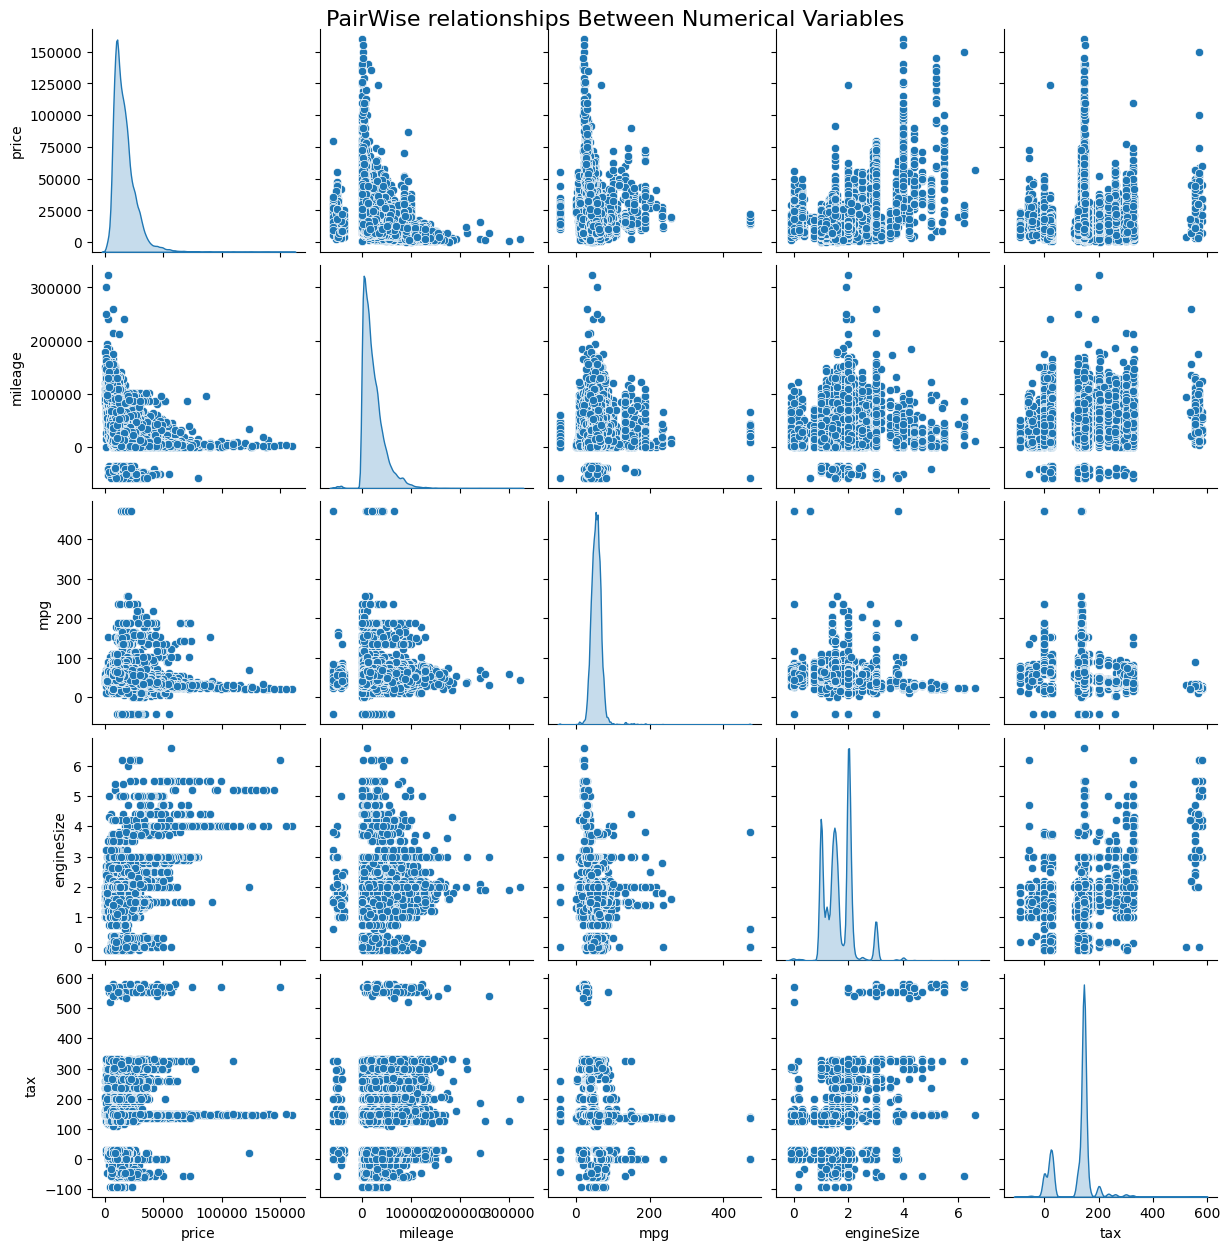

In [34]:
sns.pairplot(df_train[["price","mileage", "mpg", "engineSize", "tax"]], diag_kind="kde")
plt.suptitle("PairWise relationships Between Numerical Variables",
             y=1,
             fontsize=16)
plt.show()

A pairplot was used to obtain an initial visual overview of the relationships between the main numerical variables and the target variable. This exploratory analysis allows for the identification of broad trends and potential non-linear patterns without making formal assumptions about the underlying relationships.

From a visual perspective, `price` tends to decrease as `mileage` increases, while higher values of `engineSize` are generally associated with higher prices, albeit with substantial dispersion. These observations are purely exploratory and serve only to guide subsequent analysis, which relies on validated modeling and evaluation procedures.

<h5 style="color: #00E676;">Brand</h5> 

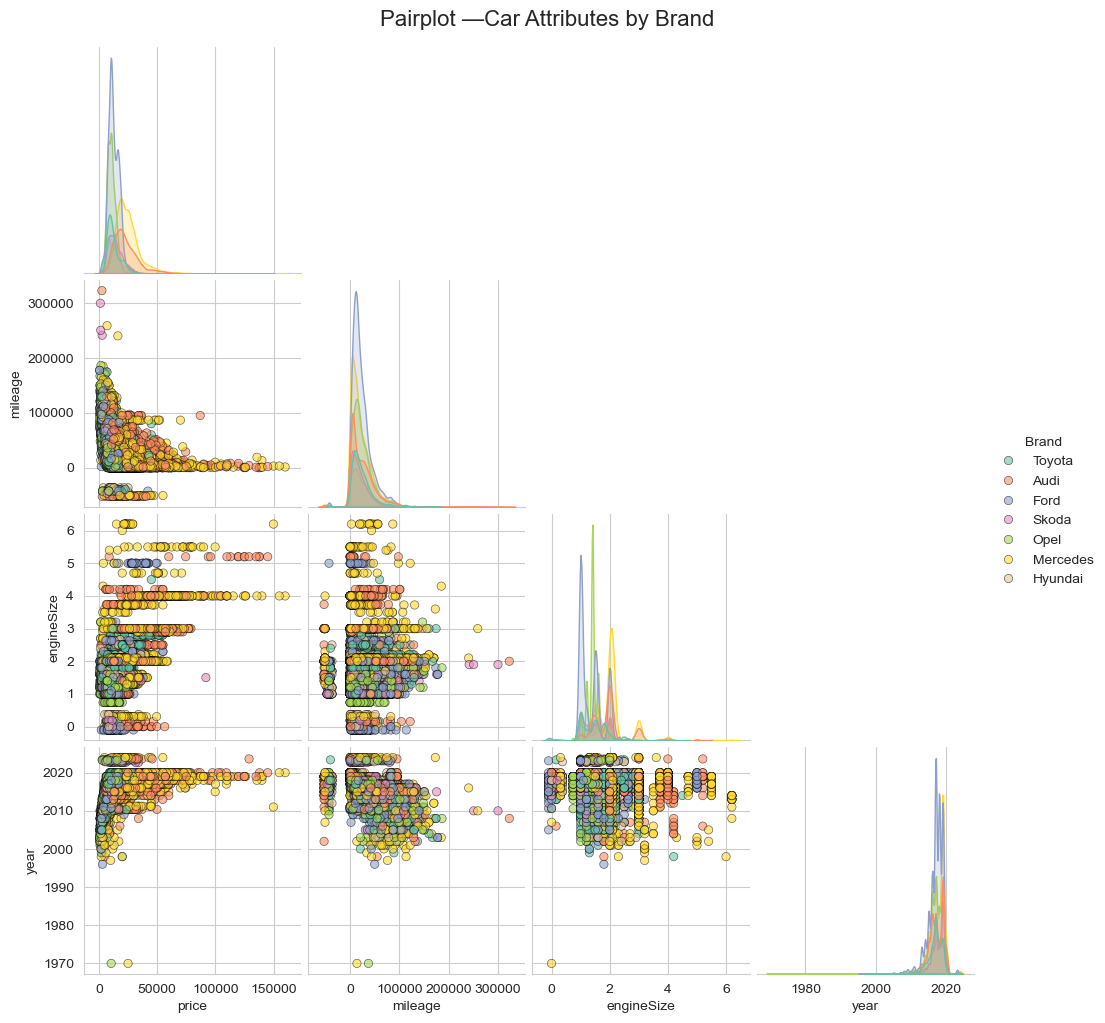

In [74]:
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="Brand",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)
plt.suptitle("Pairplot —Car Attributes by Brand",
             y=1.02,
             fontsize=16)
plt.show()

The pairplot provides a consolidated visual overview of the relationships between key numerical variables and illustrates how these patterns vary across different brands. Consistent visual trends are observed across the plots, including a general increase in `price` with `year`, a decrease in `price` with increasing `mileage`, and differences in price levels associated with `engineSize`.

Brand-specific patterns are also evident. Certain brands tend to occupy higher ranges of price and engine size, while others are more concentrated in lower value regions across the examined variables. These differences highlight heterogeneity in how vehicle attributes are distributed across manufacturers.

Overall, this pairplot serves as an exploratory summary that brings together previously observed patterns and motivates further, more formal analysis to assess the relevance of these relationships.

<h5 style="color: #00E676;">Key Car Attributes by Transmission</h5> 

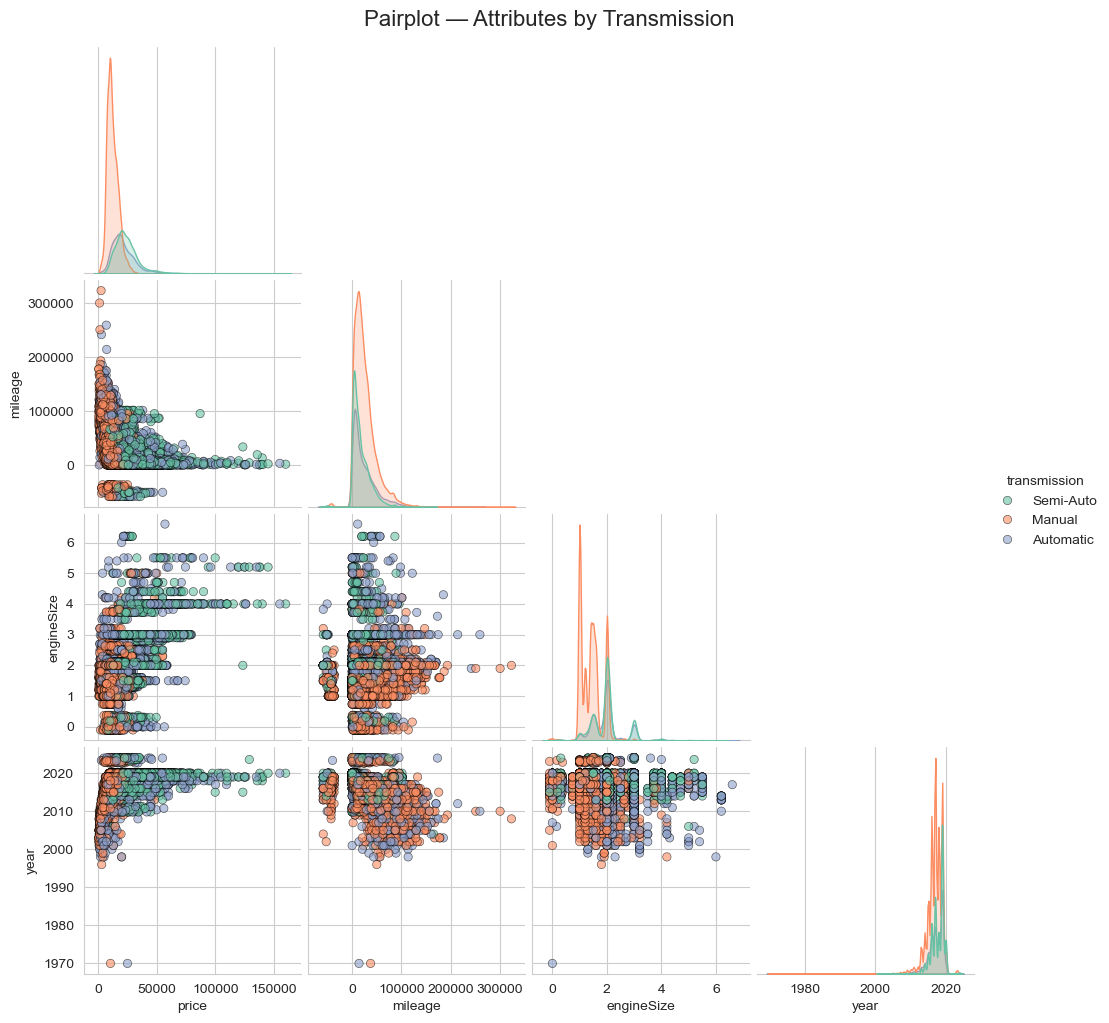

In [75]:
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="transmission",
    palette="Set2",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Transmission", y=1.02, fontsize=16)
plt.show()

The pairplot highlights noticeable differences in the distribution of key numerical variables across transmission types. Automatic and Semi-Automatic vehicles tend to appear more frequently in higher price regions and are often associated with larger engine sizes, while Manual vehicles are more concentrated in lower to mid-range price and engine size values.

Differences are also observed in how mileage and production year are distributed across transmission categories, suggesting that transmission type is linked to distinct vehicle profiles within the dataset. These patterns indicate heterogeneity in the relationship between vehicle attributes and transmission type.

Overall, this analysis is exploratory and serves to highlight systematic differences across transmission categories, motivating further investigation in subsequent modeling stages.

<h5 style="color: #00E676;">Key Car Attributes by Fuel Type</h5> 

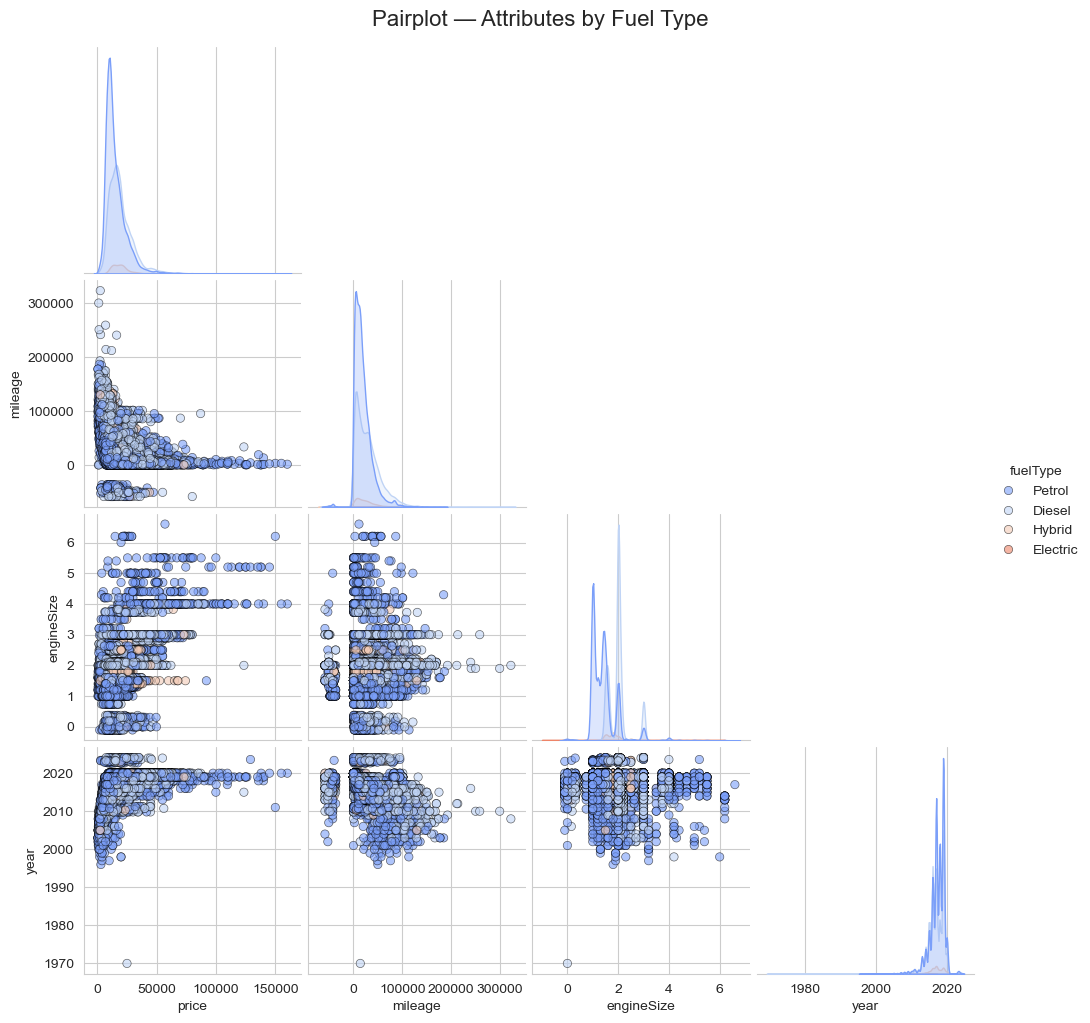

In [76]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.pairplot(
    df_filtered,
    vars=["price", "mileage", "engineSize", "year"],
    hue="fuelType",
    palette="coolwarm",
    corner=True,
    plot_kws={"alpha":0.6, "edgecolor":"k"}
)

plt.suptitle("Pairplot — Attributes by Fuel Type", y=1.02, fontsize=16)
plt.show()

The pairplot offers an exploratory overview of how vehicle attributes vary across different fuel types. Distinct patterns are visible in the distribution of price, production year, mileage, and engine size across fuel categories.

Hybrid and Electric vehicles are predominantly concentrated in more recent production years and tend to appear in higher price ranges, while also being associated with smaller engine sizes. In contrast, Petrol and Diesel vehicles are spread across a wider range of years, prices, mileages, and engine sizes, reflecting a broader diversity of vehicle profiles within these categories.

These observations highlight heterogeneity in how vehicle characteristics are distributed across fuel types and motivate further analysis to assess how such differences may influence predictive performance in later modeling stages.

<h4 style="color: #00E676;">Multivariate Analysis</h4> 

<h5 style="color: #00E676;">FuelType, Mileage and Price</h5> 

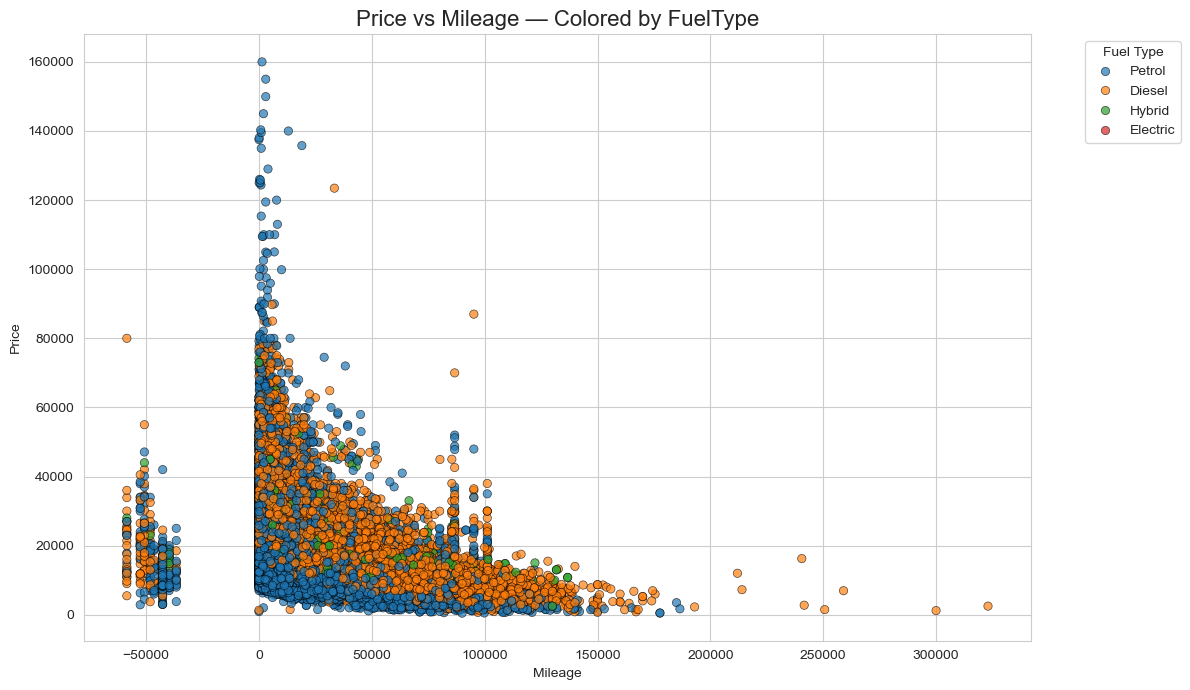

In [77]:
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="fuelType",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by FuelType", fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The scatterplot highlights a clear decreasing trend between `price` and `mileage` across the most common fuel types, suggesting that higher mileage is generally associated with lower prices. This pattern appears consistently for Petrol and Diesel vehicles, although with substantial dispersion.

Additionally, the distribution of observations varies across fuel types. Hybrid and Electric vehicles are predominantly concentrated in regions of lower mileage and higher prices, reflecting differences in the characteristics of vehicles present in the dataset. These patterns indicate that the relationship between mileage and price is not uniform across fuel types and motivate a more detailed analysis that accounts for both continuous and categorical variables.

<h5 style="color: #00E676;">Brand, Mileage and Price</h5> 

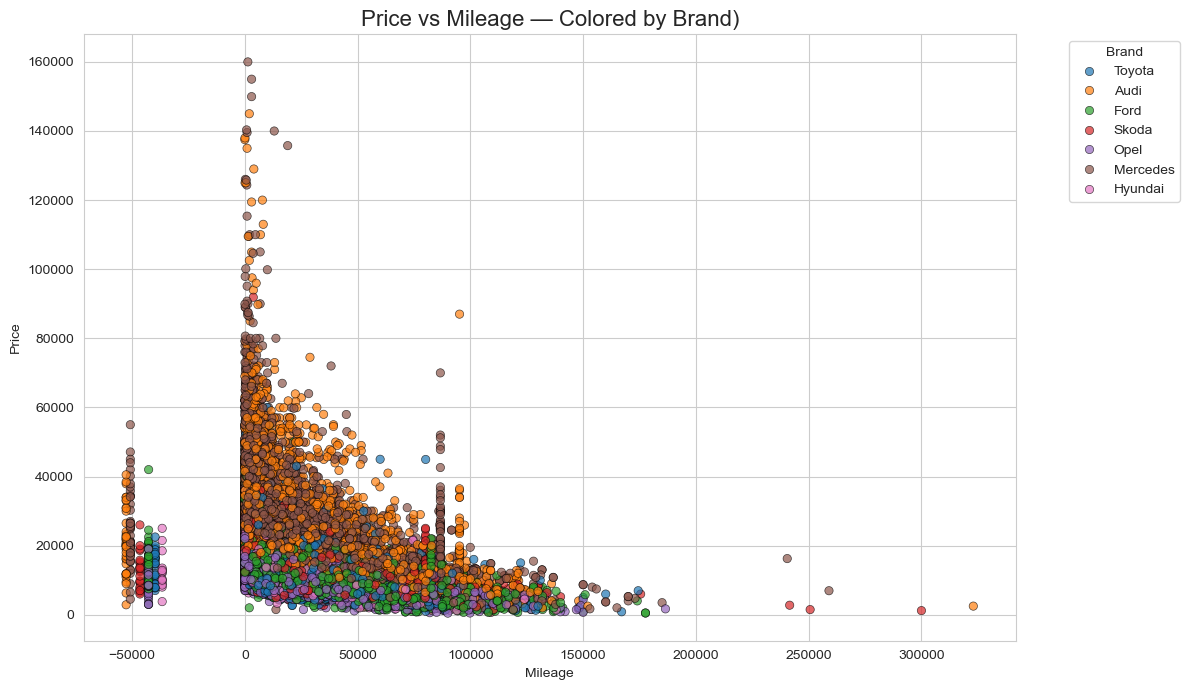

In [78]:
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.scatterplot(
    data=df_filtered,
    x="mileage",
    y="price",
    hue="Brand",         
    alpha=0.7,
    edgecolor="black"
)

plt.title("Price vs Mileage — Colored by Brand)",
          fontsize=16)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The scatterplot reveals a clear segmentation of observations by brand. While all brands follow a general decreasing trend between `price` and `mileage`, systematic differences are observed across manufacturers.

Premium brands such as Audi, BMW, and Mercedes tend to occupy higher price regions across a wide range of mileage values, whereas mass-market brands such as Ford, Toyota, and VW are more concentrated in lower price ranges. This visual stratification suggests that brand-related characteristics influence price levels and depreciation patterns.

These observations are exploratory in nature and highlight the need to account for brand-related effects in subsequent stages of the analysis.

<h5 style="color: #00E676;">Price, Year and FuelType</h5> 

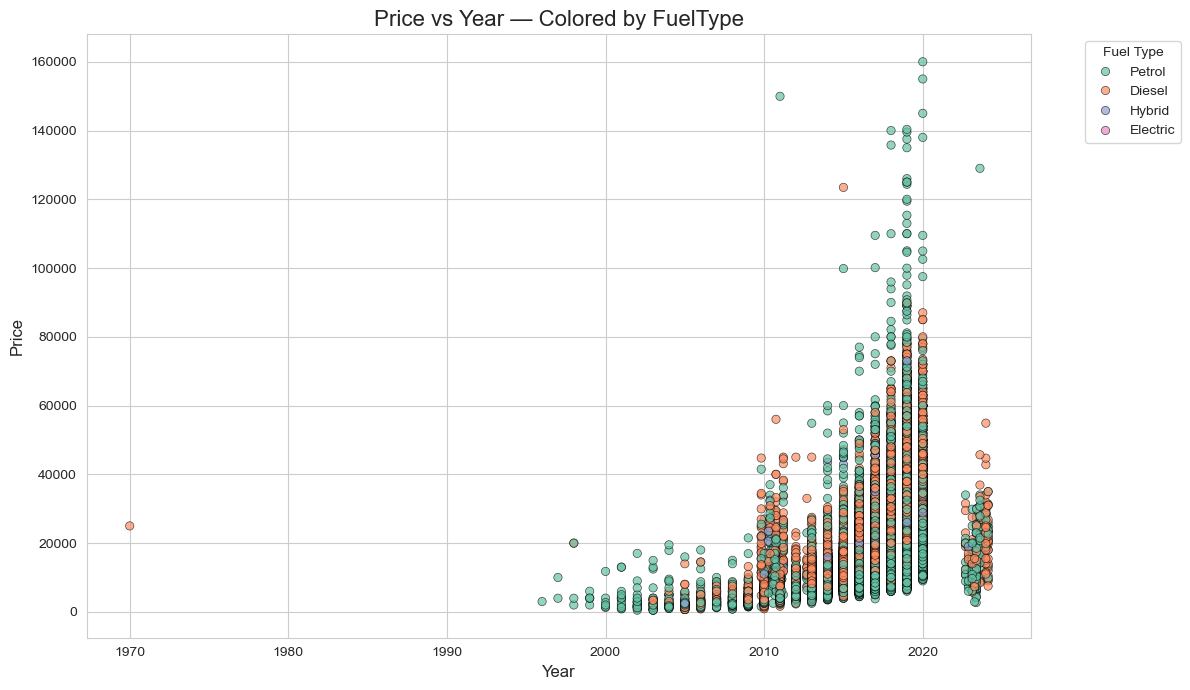

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",              
    y="price",                
    hue="fuelType",           
    palette="Set2",             
    alpha=0.7,                 
    edgecolor="k"            
)

# Titles and labels
plt.title("Price vs Year — Colored by FuelType",
          fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Fuel Type")
plt.tight_layout()
plt.show()

The scatterplot shows a clear upward trend between `year` and `price`, indicating that vehicles from more recent years tend to be associated with higher prices across all fuel types. This pattern is visually consistent, although substantial dispersion is observed within each year.

Differences across fuel types are also apparent. Petrol and Diesel vehicles are distributed across a wide temporal range, while Hybrid and Electric vehicles are predominantly concentrated in more recent years and generally occupy higher price regions. This reflects differences in the composition of the dataset and highlights heterogeneity in how vehicle characteristics relate to price.

These observations are exploratory and serve to motivate further analysis that accounts for both temporal effects and fuel-type-related differences.

<h5 style="color: #00E676;">Price, Year and Brand</h5> 

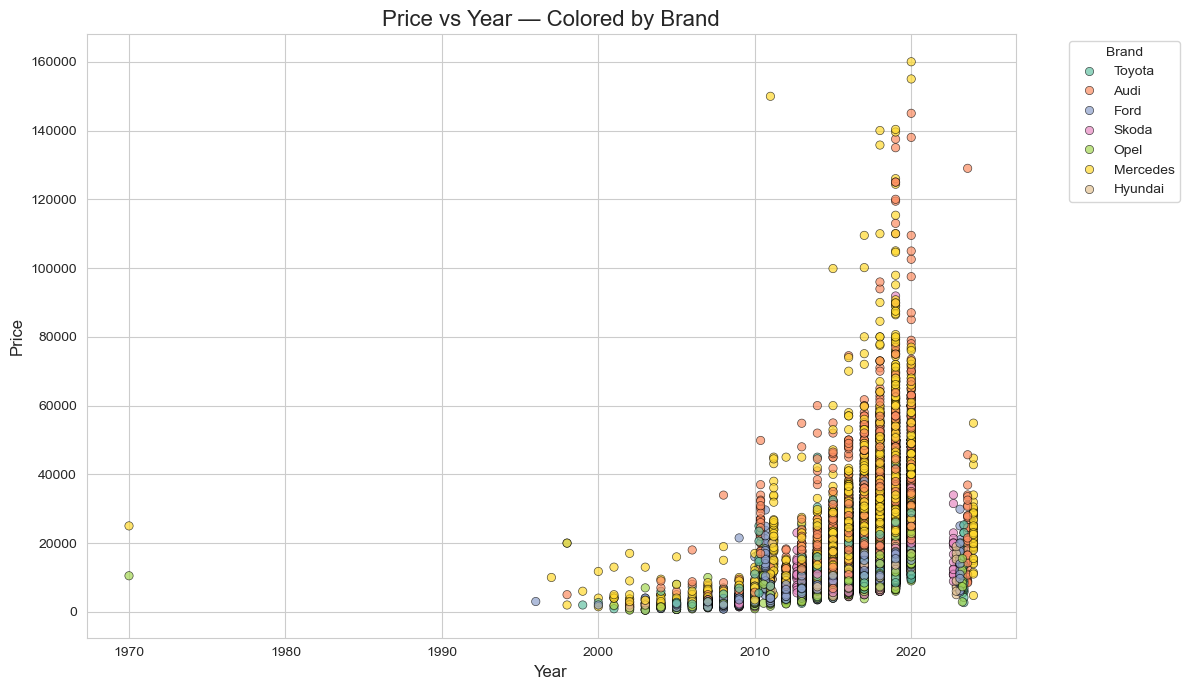

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]


sns.scatterplot(
    data=df_filtered,
    x="year",                
    y="price",                 
    hue="Brand",             
    palette="Set2",           
    alpha=0.7,                 
    edgecolor="k"               
)


plt.title("Price vs Year — Colored by Brand", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1),
           loc=2,
           title="Brand")
plt.tight_layout()
plt.show()

The scatterplot highlights a clear stratification of vehicle prices by brand across different production years. While all brands exhibit an upward trend between `year` and `price`, systematic differences in price levels are observed between manufacturers.

Brands commonly regarded as higher-end, such as Audi, BMW, and Mercedes, tend to occupy higher price regions at comparable production years, whereas brands such as Ford, Toyota, VW, Opel, and Hyundai are more concentrated in lower price ranges. This vertical separation is visually consistent across the observed time span and reflects heterogeneity in how different brands are positioned in the market.

These patterns are exploratory and indicate that brand-related characteristics play a role in shaping price distributions over time, motivating further analysis that accounts for such categorical differences.

<h4 style="color: #00E676;">BoxPlots to distributions</h4> 

<h5 style="color: #00E676;">Price distribution by Brand</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_2384\381057388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


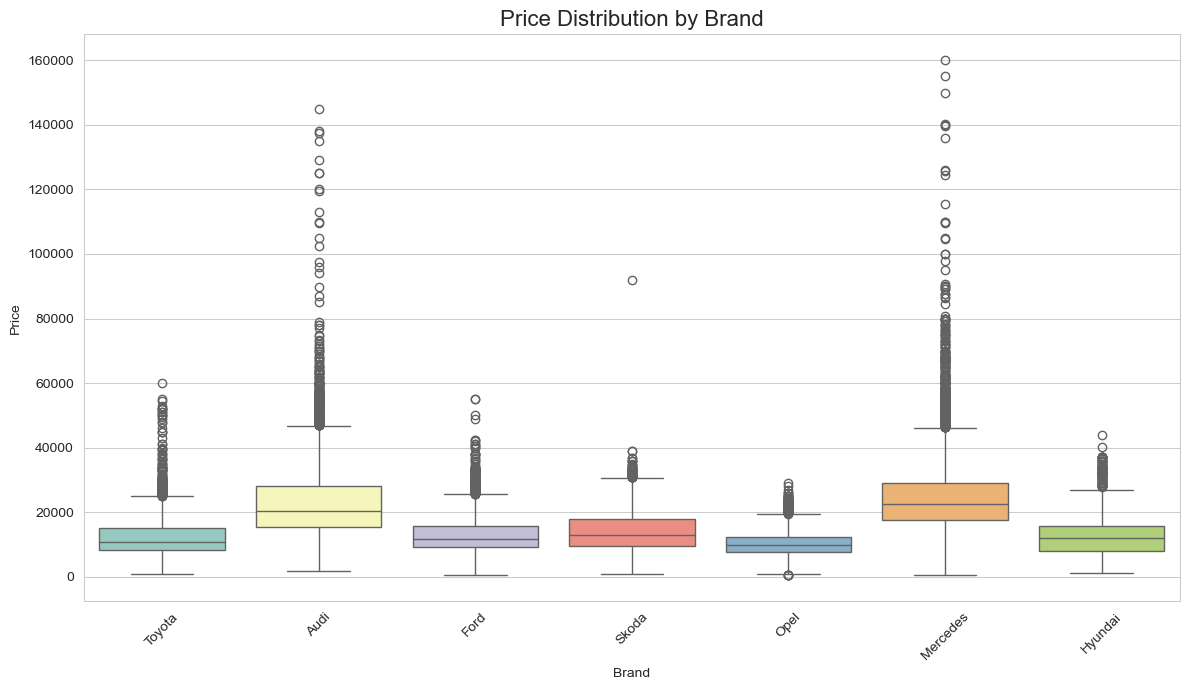

In [81]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

brand_filter = ["VW", "Toyota", "Audi", "Ford", "BMW", "Skoda", "Opel", "Mercedes", "Hyundai"]
df_filtered = df_train[df_train["Brand"].isin(brand_filter)]

sns.boxplot(
    data=df_filtered,
    x="Brand",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Brand", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplot analysis highlights a clear **vertical stratification** of vehicle prices across brands. **Premium brands**, such as `Mercedes` and `Audi`, exhibit the **highest median prices** and wider **interquartile ranges (IQR)**, indicating both higher market positioning and greater price variability.

In contrast, **mass-market brands** (`Ford`, `VW`, `Toyota`, `Skoda`, `Opel`, `Hyundai`) consistently occupy the **lower price tier**, with substantially lower median prices and generally narrower IQRs.

Across all brands, the presence of multiple **upper outliers** suggests that high-priced vehicles (e.g., luxury or performance variants) can still be found within otherwise lower-priced segments.

Overall, this strong segmentation confirms that `Brand` is a **relevant categorical variable** for capturing differences in price distributions and should be retained for subsequent modeling stages.


<h5 style="color: #00E676;">Price Distribution by Transmission</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_2384\4222811036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


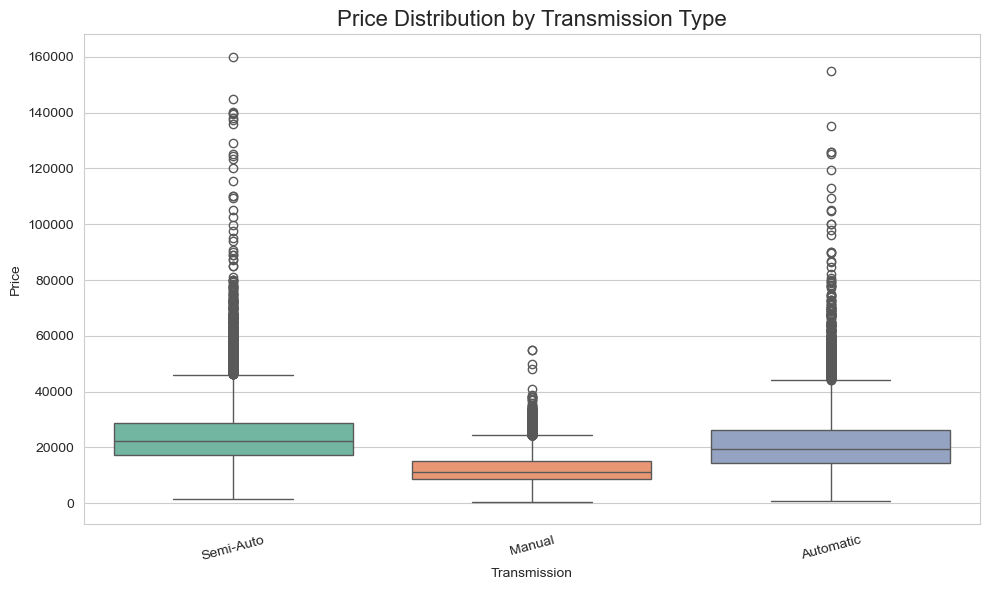

In [82]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

trans_filter = ["Automatic", "Manual", "Semi-Auto"]
df_filtered = df_train[df_train["transmission"].isin(trans_filter)]

sns.boxplot(
    data=df_filtered,
    x="transmission",
    y="price",
    palette="Set2"
)

plt.title("Price Distribution by Transmission Type", fontsize=16)
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The boxplot highlights a clear **price stratification by transmission type**. Vehicles with `Automatic` transmission exhibit the **highest median prices**, followed closely by `Semi-Auto`, while `Manual` cars consistently show the **lowest median price levels**.

In addition to higher medians, `Automatic` and `Semi-Auto` transmissions present a **larger interquartile range (IQR)** and a higher number of **upper-end outliers**, indicating greater price variability and a stronger presence in the **high-value segment** of the market. This suggests that these transmission types are more commonly associated with newer, more powerful, or premium vehicles.

Conversely, `Manual` transmission vehicles are concentrated in a **lower and narrower price range**, reflecting their predominance in more affordable and mass-market segments.

These observations reinforce that `Transmission` acts as a **relevant categorical feature**, influencing both the central tendency and dispersion of vehicle prices, and therefore should be explicitly encoded and retained in the predictive modeling stage.


<h5 style="color: #00E676;">Price Distribution by FuelType</h5> 

C:\Users\danie\AppData\Local\Temp\ipykernel_2384\4062865563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


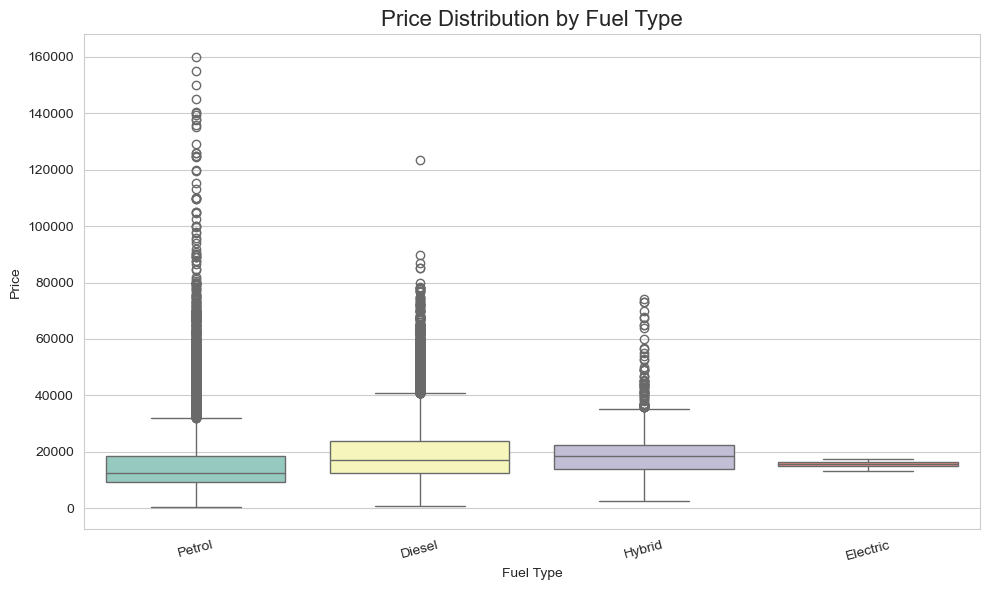

In [83]:
sns.set_style("whitegrid")

fuel_filter = ["Diesel", "Petrol", "Hybrid", "Electric"]
df_filtered = df_train[df_train["fuelType"].isin(fuel_filter)]

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x="fuelType",
    y="price",
    palette="Set3"
)

plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The boxplot of `Price` segmented by `Fuel Type` reveals **clear differences in price distributions** across fuel technologies. `Hybrid` and `Electric` vehicles exhibit the **highest median prices**, reflecting their concentration in more recent model years and their positioning in higher-value market segments.

`Diesel` vehicles occupy an intermediate price range, with a higher median price than `Petrol` cars, which consistently show the **lowest median prices** among all fuel types. This suggests that diesel vehicles tend to retain relatively higher market values compared to petrol vehicles within the dataset.

All fuel categories present a noticeable number of **upper-end outliers**, indicating the presence of high-value or premium models across all fuel types rather than being exclusive to a single category.

Overall, this analysis confirms that `Fuel Type` acts as a **relevant categorical variable**, contributing to systematic differences in vehicle price distributions and justifying its inclusion in the predictive modeling process.


<h4 style="color: #00E676;">Correlation Matrix before cleaning the data</h4> 

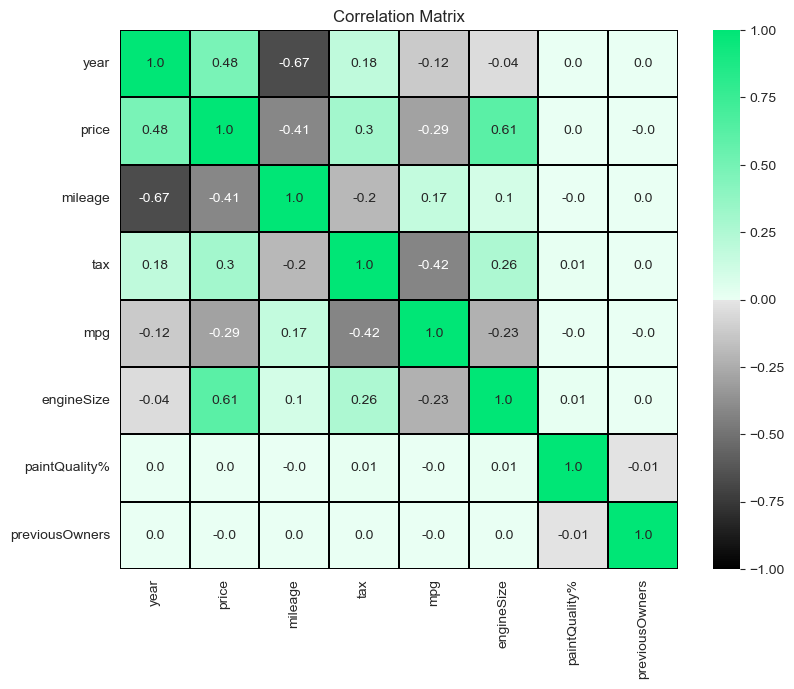

In [84]:
num = df_train.select_dtypes(include="number").drop(columns=["carID", "hasDamage"], errors="ignore")
corr = num.corr(numeric_only=True).round(2)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix provides an initial assessment of **linear relationships** between the numerical variables and the target variable, `price`.

Among the numerical features, `engineSize` shows the **highest positive correlation** with `price` (≈ 0.61), suggesting that vehicles with larger engines tend to be priced higher. `Year` also exhibits a **moderate to strong positive correlation** with `price` (≈ 0.48), indicating that newer vehicles generally command higher prices.

In contrast, `mileage` presents a **moderate negative correlation** with `price` (≈ -0.41), which is consistent with the expected depreciation effect as vehicle usage increases.

Regarding relationships between predictors, some degree of correlation is observed (e.g., between `engineSize` and `tax`, ≈ 0.26), although these values remain within a moderate range. While this does not indicate severe multicollinearity at this stage, it highlights the importance of considering model choices that can handle correlated features appropriately.

Overall, this analysis suggests that `engineSize`, `Year`, and `mileage` are among the **most relevant numerical variables** associated with `price`, serving as a useful reference for subsequent modeling and validation steps.


<h2 style="color: #00E676;">2.2. Data Preprocessing</h2>

In [35]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [36]:
df_train.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.00,74482.00,75973.00,74510.00,68069.00,68047.00,74457.00,74449.00,74423.00,74425.0
mean,37986.00,2017.10,16881.89,23004.18,120.33,55.15,1.66,64.59,1.99,0.0
std,21931.66,2.21,9736.93,22129.79,65.52,16.50,0.57,21.02,1.47,0.0
min,0.00,1970.00,450.00,-58540.57,-91.12,-43.42,-0.10,1.64,-2.35,0.0
25%,18993.00,2016.00,10200.00,7423.25,125.00,46.30,1.20,47.00,1.00,0.0
50%,37986.00,2017.00,14699.00,17300.00,145.00,54.30,1.60,65.00,2.00,0.0
75%,56979.00,2019.00,20950.00,32427.50,145.00,62.80,2.00,82.00,3.00,0.0
max,75972.00,2024.12,159999.00,323000.00,580.00,470.80,6.60,125.59,6.26,0.0


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           75973 non-null  object 
 2   model           75973 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    75973 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        75973 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [38]:
df_train_new = df_train.copy()
df_test_new  = df_test.copy()


<h4 style="color: #00E676;">Remove column "HasDamage"</h4> 

In [39]:
#Function to remove "hasDamage and paintQuality%"
def initial_cleaning(df):
    if "hasDamage" in df.columns:
        df = df.drop(columns=["hasDamage", "paintQuality%"])
    
    return df

In [40]:
#Aplly the function for the train and the test datasets
df_train_new = initial_cleaning(df_train_new)
df_test_new = initial_cleaning(df_test_new)
df_train_new.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners
0,69512,Vw,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,4.000000
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,1.000000
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,4.000000
3,29021,Ford,Fiesta,2018.0,12500,Anual,9102.0,Petrol,145.0,65.700000,1.0,-2.340306
4,10062,Bmw,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,3.000000


**Dropping** the `HasDamage` column, since all known values are `0` and the variable has **no relevance** for the model. **Dropping** the paintQuality column because it is the mechanic’s assessment of the cars’ overall paint quality and hull integrity not relevant for the model.

<h3 style="color: #00E676;">2.1. Digitalization Problems Solve</h3>

<h4 style="color: #00E676;">2.1.1. Brand </h4>

**Correction** of the **brand names** in the `Brand` column, with only the `N/A` **values remaining** using the function dig_solve_brand.

In [41]:
def dig_solve_brand(df):
    """
    Cleans and standardizes the Brand column by correcting common typos,
    harmonizing brand names, and setting invalid entries as NaN.
    """
    brand_clean = df["Brand"].astype(str).str.strip().str.lower()

    #Corrections dictionary
    corrections = {
        "ercece": "mercedes", "mercede": "mercedes", "ercedes": "mercedes", "ercede": "mercedes",
        "for": "ford", "ord": "ford", "or": "ford",
        "bmw": "bmw", "mw": "bmw", "bm": "bmw", "m": "bmw",
        "ope": "opel", "pel": "opel", "pe": "opel",
        "vw": "vw", "w": "vw", "v": "vw",
        "aud": "audi", "udi": "audi", "ud": "audi",
        "oyota": "toyota", "toyot": "toyota", "oyot": "toyota",
        "koda": "skoda", "skod": "skoda", "kod": "skoda",
        "hyunda": "hyundai", "yundai": "hyundai", "yunda": "hyundai",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Apply corrections
    brand_clean = brand_clean.replace(corrections)

    # Standardize capitalization
    df["Brand_clean"] = brand_clean.str.title()

    return df

In [42]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_brand(df_train_new)
df_test_new = dig_solve_brand(df_test_new)
df_train_new["Brand_clean"].value_counts(dropna=False)

Brand_clean
Ford        16063
Mercedes    11674
Vw          10385
Opel         9352
Bmw          7392
Audi         7325
Toyota       4622
Skoda        4303
Hyundai      3336
NaN          1521
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.2. Fuel Type </h4>

**Correct** the **names** of the **different fuel types** in the `Fueltype` column, leaving only the `N/A` **values remaining** using the function dig_solve_type.

In [43]:
def dig_solve_type(df):
    """
    Cleans and standardizes the fuelType column by correcting common typos
    and mapping invalid or unknown entries to NaN.
    """
    fuel = df["fuelType"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "petro": "petrol", "etrol": "petrol", "etro": "petrol",
        "iesel": "diesel", "diese": "diesel", "iese": "diesel",
        "hybri": "hybrid", "ybrid": "hybrid", "ybri": "hybrid",
        "othe": "other", "ther": "other",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": np.nan
    }

    # Apply corrections
    fuel = fuel.replace(corrections)
    df["fuelType_clean"] = fuel

    return df

In [44]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_type(df_train_new)
df_test_new = dig_solve_type(df_test_new)
df_train_new["fuelType_clean"].value_counts(dropna=False)


fuelType_clean
petrol      41181
diesel      30885
hybrid       2225
NaN          1511
other         167
electric        4
Name: count, dtype: int64

<h4 style="color: #00E676;">2.1.3. Transmission </h4>


**Correct** the **names** of the **different transmission types** in the `transmission` column, leaving only the `N/A` **values remaining** using the function dig_solve_transmission.

In [45]:
def dig_solve_transmission(df):
    """
    Cleans and standardizes the transmission column by correcting common typos
    and harmonizing transmission categories.
    """

    tr = df["transmission"].astype(str).str.strip().str.lower()

    # Corrections dictionary
    corrections = {
        "anual": "manual", "manua": "manual", "anua": "manual",
        "semi-aut": "semi-auto", "emi-auto": "semi-auto", "emi-aut": "semi-auto",
        "automati": "automatic", "utomatic": "automatic", "utomati": "automatic",
        "unknow": "unknown", "nknown": "unknown", "nknow": "unknown",
        "other": "unknown",
        "": np.nan, "nan": np.nan, "none": np.nan, "unknown": "unknown"
    }

    # Apply corrections
    tr = tr.replace(corrections)
    df["transmission_clean"] = tr

    return df

In [46]:
#Aplly function to the train and test datasets
df_train_new = dig_solve_transmission(df_train_new)
df_test_new = dig_solve_transmission(df_test_new)
df_test_new["transmission_clean"].value_counts(dropna=False)


transmission_clean
manual       17889
semi-auto     7267
automatic     6440
NaN            623
unknown        348
Name: count, dtype: int64

In [47]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 15)
(32567, 14)


<h4 style="color: #00E676;">2.1.4. Model - Correction model names with RapidFuzz </h4>

A normalization function `(_norm)` was developed to **standardize strings** before correction, converting them to **lowercase**, **special characters**, and **extra spaces** to ensure **consistent comparisons**.

Then, the `find_best_in_catalog` function was created to check whether a **value exists** in the **canonical catalog** and, if not, apply approximate **matching** (fuzzy matching) using the `RapidFuzz` library. The algorithms `token_set_ratio` and `token_sort_ratio` were used, returning the most **similar value**, its similarity score, and the method applied. Two `thresholds` (threshold_high and threshold_low) were also defined to **control** the **confidence level** of accepted matches.

Based on this function, a **canonical catalog** of models was built for **each brand**, considering only models with a frequency above a brand-specific limit defined in `threshold_dict`. For each brand, the function was applied within its ***respective catalog**, and valid matches (`token_set` or `token_sort`) were stored in a **mapping** dictionary (`model_cleaning_dict`).

Finally, the `model_clean_fuzzy` column was created to apply the **automatic corrections** stored in the **dictionary**, **keeping** the **original value** when **no match** was found. This process ensured the standardization of model names within each brand,** reducing spelling errors** and **inconsistencies**.

In [48]:
from rapidfuzz import process, fuzz
import numpy as np
import pandas as pd
import re, unicodedata

def _norm(s):
    if s is None or (isinstance(s, float) and pd.isna(s)):
        return ""
    s = str(s).casefold().strip()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[/_.\-]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def find_best_in_catalog(word, catalog_list, threshold_high=92, threshold_low=85):
    if word is None or (isinstance(word, float) and pd.isna(word)):
        return (word, 0.0, "null")
    if not catalog_list:
        return (word, 0.0, "no_catalog")

    word_norm = _norm(word)

    # normaliza o catálogo mas guarda canonical
    # (se houver colisões, fica a última — idealmente o catálogo já é canonical)
    norm_to_canon = {_norm(c): c for c in catalog_list}
    catalog_norm = list(norm_to_canon.keys())

    # match exato após normalização
    if word_norm in norm_to_canon:
        return (norm_to_canon[word_norm], 100.0, "exact_in_catalog")

    best_norm, score, _ = process.extractOne(word_norm, catalog_norm, scorer=fuzz.token_set_ratio)
    method = "token_set"

    best_norm2, score2, _ = process.extractOne(word_norm, catalog_norm, scorer=fuzz.token_sort_ratio)
    if score2 > score:
        best_norm, score, method = best_norm2, score2, "token_sort"

    best_canon = norm_to_canon.get(best_norm, word)

    if score >= threshold_high:
        return (best_canon, float(score), method)
    elif score >= threshold_low:
        return (best_canon, float(score), method)
    else:
        return (best_canon, float(score), "review")

def build_model_catalog(df_train, threshold_dict):
    catalog_dict = {}

    # garante que Brand_clean está normalizado como no threshold_dict (ex: "ford")
    brands = df_train["Brand_clean"].dropna().unique()

    for brand in brands:
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()

        # conta por "model" ORIGINAL, mas podes querer contar por _norm(model) se houver muita variação
        freq = (
            df_brand.dropna(subset=["model"])
            .groupby("model")
            .size()
            .reset_index(name="count")
            .sort_values(by="count", ascending=False)
        )

        threshold = threshold_dict.get(brand_norm, 0)
        catalog_dict[brand_norm] = list(freq.loc[freq["count"] >= threshold, "model"])

    return catalog_dict

def build_model_cleaning_dict(df_train, catalog_dict):
    cleaning_dict = {}

    for brand in df_train["Brand_clean"].dropna().unique():
        brand_norm = _norm(brand)
        df_brand = df_train[df_train["Brand_clean"] == brand].copy()
        catalog_list = catalog_dict.get(brand_norm, [])

        for model in df_brand["model"].dropna().unique():
            match, score, status = find_best_in_catalog(model, catalog_list)

            # chave normalizada (robusta)
            key = f"{brand_norm}-{_norm(model)}"

            # só “auto-corrige” quando tens confiança
            if status in ("token_set", "token_sort", "exact_in_catalog"):
                cleaning_dict[key] = match

    return cleaning_dict

def apply_model_cleaning(df, cleaning_dict, out_col="model_clean_fuzzy"):
    df = df.copy()

    brand_norm = df["Brand_clean"].map(_norm)
    model_norm = df["model"].map(_norm)

    key = brand_norm + "-" + model_norm

    # só tenta map quando há brand e model
    mask = df["Brand_clean"].notna() & df["model"].notna()
    df[out_col] = df["model"]

    df.loc[mask, out_col] = key[mask].map(cleaning_dict).fillna(df.loc[mask, "model"])

    # opcional: padronizar só a “apresentação”, sem destruir canonical
    df[out_col] = df[out_col].astype(str).str.strip()

    return df


In [49]:
threshold_dict = {
    "ford": 139,
    "vw": 40,
    "opel": 66,
    "mercedes": 128,
    "bmw": 66,
    "audi": 219,
    "toyota": 34,
    "skoda": 86,
    "hyundai": 70,
}

In [50]:
catalog_dict = build_model_catalog(df_train_new, threshold_dict)
model_cleaning_dict = build_model_cleaning_dict(df_train_new, catalog_dict)
df_train_new = apply_model_cleaning(df_train_new, model_cleaning_dict)
df_test_new  = apply_model_cleaning(df_test_new,  model_cleaning_dict)


In [51]:
df_train["model"].apply(type).value_counts()

model
<class 'str'>    75973
Name: count, dtype: int64

In [52]:
df_train_new["model_clean_fuzzy"].apply(type).value_counts()

model_clean_fuzzy
<class 'str'>    75973
Name: count, dtype: int64

In [53]:
df_train["model"] = df_train["model"].astype(str).str.strip().str.title()
model_counts = df_train["model"].value_counts(dropna=False)
model_counts

model
Focus           6775
C Class         5194
Fiesta          4384
Golf            3261
Corsa           2319
                ... 
Urban Cruise       1
6 Serie            1
Land Cruise        1
Vers               1
Terracan           1
Name: count, Length: 297, dtype: int64

In [54]:
df_train_new["model_clean_fuzzy"] = df_train_new["model_clean_fuzzy"].astype(str).str.strip().str.title()
model_counts = df_train_new["model_clean_fuzzy"].value_counts(dropna=False)
model_counts

model_clean_fuzzy
Focus            6911
C Class          5286
Fiesta           4469
Golf             3266
Corsa            2359
                 ... 
Urban Cruise        1
Fiest               1
Terracan            1
Zafira Tourer       1
Grand C-Ma          1
Name: count, Length: 218, dtype: int64

In [55]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_clean',
       'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy'],
      dtype='object')


In [56]:
df_train_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)
df_test_new.drop(columns=["Brand", "model", "fuelType", "transmission"], inplace=True)

In [57]:
print(df_train_new.columns)
print(df_test_new.columns)

Index(['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')
Index(['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
       'previousOwners', 'Brand_clean', 'fuelType_clean', 'transmission_clean',
       'model_clean_fuzzy'],
      dtype='object')


In [58]:
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


The normalization of model names was performed using deterministic methods and fuzzy matching based exclusively on the training set, without using any information from the target. The corrected model catalog was then applied to the test set. Since this transformation depends only on the observed categories and not on any statistical metric, it does not introduce data leakage and can be performed prior to cross-validation.

<h3 style="color: #00E676;">2.2. Solve inconsistencies - Convert to N/A all invalid values</h3>

In [59]:
def clean_invalid_numeric_values(df, max_year=2020):
    """
    Performs structural cleaning of numeric variables by converting invalid
    or physically impossible values to NaN.
    """

    df = df.copy()

    # Year (dataset from 2020)
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df.loc[df["year"] > max_year, "year"] = np.nan

    # Mileage
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
    df.loc[df["mileage"] < 0, "mileage"] = np.nan

    # MPG
    df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")
    df.loc[df["mpg"] < 0, "mpg"] = np.nan

    # Engine size
    df["engineSize"] = pd.to_numeric(df["engineSize"], errors="coerce")
    df.loc[df["engineSize"] < 0, "engineSize"] = np.nan
    df.loc[
        (df["engineSize"] == 0) & (df["fuelType_clean"].isin(["petrol", "diesel"])),
        "engineSize"
    ] = np.nan

    # Tax
    df["tax"] = pd.to_numeric(df["tax"], errors="coerce")
    df.loc[df["tax"] < 0, "tax"] = np.nan

    # Previous owners
    df["previousOwners"] = pd.to_numeric(df["previousOwners"], errors="coerce")
    df.loc[df["previousOwners"] < 0, "previousOwners"] = np.nan

    return df

In [60]:
#Aplly function to the train and test datasets
df_train_new = clean_invalid_numeric_values(df_train_new)
df_test_new  = clean_invalid_numeric_values(df_test_new)

In [61]:
print(
    "Year > 2020:",
    (df_train_new["year"] > 2020).sum(),
    "| Negative mileage:",
    (df_train_new["mileage"] < 0).sum(),
    "| Negative mpg:",
    (df_train_new["mpg"] < 0).sum(),
    "| Negative engineSize:",
    (df_train_new["engineSize"] < 0).sum(),
    "| engineSize = 0 (petrol/diesel):",
    (
        (df_train_new["engineSize"] == 0) &
        (df_train_new["fuelType_clean"].isin(["petrol", "diesel"]))
    ).sum(),
    "| Negative tax:",
    (df_train_new["tax"] < 0).sum(),
    "| Negative previousOwners:",
    (df_train_new["previousOwners"] < 0).sum()
)

Year > 2020: 0 | Negative mileage: 0 | Negative mpg: 0 | Negative engineSize: 0 | engineSize = 0 (petrol/diesel): 0 | Negative tax: 0 | Negative previousOwners: 0


<h3 style="color: #00E676;">2.3. Missing Values</h3>

In [62]:
print(df_train_new.isnull().sum())
print("--------------------------")
print(df_test_new.isnull().sum())

carID                    0
year                  1849
price                    0
mileage               1832
tax                   8282
mpg                   7962
engineSize            1754
previousOwners        1921
Brand_clean           1521
fuelType_clean        1511
transmission_clean    1522
model_clean_fuzzy        0
dtype: int64
--------------------------
carID                    0
year                   833
mileage                859
tax                   3469
mpg                   3305
engineSize             740
previousOwners         765
Brand_clean            649
fuelType_clean         656
transmission_clean     623
model_clean_fuzzy        0
dtype: int64


<h4 style="color: #00E676;"> Year </h4>

In [63]:
def fit_year_imputer(df_train):
    """
    Learns hierarchical statistics for year imputation using training data only.
    Imputation follows a fallback strategy: model-level median, then brand-level
    median, and finally the global median.
    """
    df = df_train.copy()

    # Median year per model (most specific)
    year_model = df.groupby("model_clean_fuzzy")["year"].median()

    # Median year per brand (fallback)
    year_brand = df.groupby("Brand_clean")["year"].median()

    # Global median year (last resort)
    year_global = df["year"].median()

    return {
        "year_model": year_model,
        "year_brand": year_brand,
        "year_global": year_global,
    }

In [64]:
def transform_year(df, stats_year):
    """
    Imputes missing year values using a hierarchical strategy based on
    statistics learned from the training data.
    """
    df = df.copy()

    missing = df["year"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Model-level median
        est = pd.Series(
            stats_year["year_model"]
            .reindex(df.loc[missing, "model_clean_fuzzy"])
            .values,
            index=idx
        )

        #Fallback: brand-level median
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_year["year_brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing2])
                .values,
                index=est.index[missing2]
            )

        # Final fallback: global median
        est = est.fillna(stats_year["year_global"])

        # Year stored as integer
        df.loc[missing, "year"] = est.round().astype("Int64")

    return df

Imputing missing year values using a hierarchical approach (model, brand and global median), since vehicle year is primarily determined by model and brand.

<h4 style="color: #00E676;"> Mileage </h4>

In [65]:
def fit_mileage_imputer(df_train, ref_year=2020):
    """
    Learns mileage imputation statistics using training data only.
    Mileage is estimated based on average annual usage (km/year),
    with a hierarchical fallback strategy: model, brand, and global.
    """
    df = df_train.copy()

    # Vehicle age (non-negative)
    age_car = (ref_year - df["year"]).clip(lower=0)

    # Valid observations for estimating annual mileage rate
    valid_car = df["mileage"].notna() & df["year"].notna() & (age_car > 0)

    # Estimated annual mileage rate (km/year)
    rate_per_year = df.loc[valid_car, "mileage"] / age_car.loc[valid_car]

    # Average rate by model, brand, and globally
    rate_model  = rate_per_year.groupby(df.loc[valid_car, "model_clean_fuzzy"]).mean()
    rate_brand  = rate_per_year.groupby(df.loc[valid_car, "Brand_clean"]).mean()
    rate_global = rate_per_year.median()

    # Special case: cars from reference year (age = 0)
    mask_2020 = (df["year"] == ref_year) & df["mileage"].notna()
    r_2020 = df.loc[mask_2020, "mileage"].median()

    return {
        "ref_year": ref_year,
        "rate_model": rate_model,
        "rate_brand": rate_brand,
        "rate_global": rate_global,
        "mileage_2020_median": r_2020,
    }

In [66]:
def transform_mileage(df, stats):
    """
    Imputes missing mileage values using annual usage estimates
    learned from the training data.
    """
    df = df.copy()

    ref_year = stats["ref_year"]
    age = (ref_year - df["year"]).clip(lower=0)

    # Missing mileage that can be estimated from vehicle age
    mileage_missing = df["mileage"].isna() & df["year"].notna() & (age > 0)
    idx_mileage_missing = df.index[mileage_missing]

    if idx_mileage_missing.size > 0:
        #  Model-level annual usage rate
        est = pd.Series(
            stats["rate_model"]
            .reindex(df.loc[mileage_missing, "model_clean_fuzzy"])
            .values,
            index=idx_mileage_missing
        )

        # Fallback: brand-level rate
        missing = est.isna()
        if missing.any():
            est.loc[missing] = pd.Series(
                stats["rate_brand"]
                .reindex(df.loc[mileage_missing, "Brand_clean"][missing])
                .values,
                index=est.index[missing]
            )

        # Final fallback: global rate
        est = est.fillna(stats["rate_global"])

        # Estimate mileage = annual rate × age
        df.loc[mileage_missing, "mileage"] = (est * age.loc[mileage_missing]).round()

    # Special case: vehicles from reference year
    mask_2020_nan = (df["year"] == ref_year) & df["mileage"].isna()
    if mask_2020_nan.any():
        median_2020 = stats["mileage_2020_median"]
        if pd.isna(median_2020):
            median_2020 = stats["rate_global"]
        df.loc[mask_2020_nan, "mileage"] = round(median_2020)

    return df

Estimating missing mileage values based on vehicle age and average annual usage, as mileage accumulates over time.

<h4 style="color: #00E676;"> Tax </h4>

In [67]:
def fit_tax_imputer(df_train):
    """
    Learns hierarchical statistics for tax imputation using training data only.
    The strategy follows a progressive fallback: brand+model+fuel, brand+model,
    brand, and finally the global median.
    """
    df = df_train.copy()

    #Median tax by Brand + Model + Fuel (most specific)
    tax_brand_model_fuel = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "fuelType_clean"]
    )["tax"].median()

    #Median tax by Brand + Model
    tax_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["tax"].median()

    #Median tax by Brand
    tax_brand = df.groupby(
        ["Brand_clean"]
    )["tax"].median()

    #Global median tax (last resort)
    tax_global = df["tax"].median()

    return {
        "brand_model_fuel": tax_brand_model_fuel,
        "brand_model": tax_brand_model,
        "brand": tax_brand,
        "global": tax_global
    }

In [68]:
def transform_tax(df, stats_tax):
    """
    Imputes missing tax values using hierarchical statistics learned
    from the training data.
    """
    df = df.copy()

    # Rows with missing tax
    missing = df["tax"].isna()
    idx = df.index[missing]

    if idx.size > 0:

        #Brand + Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_tax["brand_model_fuel"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_tax["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        #Fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_tax["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing3])
                .values,
                index=est.index[missing3]
            )

        #Final fallback: global median
        est = est.fillna(stats_tax["global"])

        # Assign imputed values
        df.loc[missing, "tax"] = est

    return df

Imputing missing tax values using hierarchical medians (Brand + Model + Fuel, Brand + Model, Brand and Global), since vehicle tax depends on engine configuration and emissions.

<h4 style="color: #00E676;"> Mpg </h4>

In [69]:
def fit_mpg_imputer(df_train):
    """
    Learns hierarchical statistics for mpg imputation using training data only.
    The strategy follows a progressive fallback: brand+model+engine size,
    brand+model, brand, model, and finally the global median.
    """
    df = df_train.copy()

    #Median mpg by Brand + Model + Engine Size (most specific)
    mpg_brand_model_engine = df.groupby(
        ["Brand_clean", "model_clean_fuzzy", "engineSize"]
    )["mpg"].median()

    #Median mpg by Brand + Model
    mpg_brand_model = df.groupby(
        ["Brand_clean", "model_clean_fuzzy"]
    )["mpg"].median()

    #Median mpg by Brand
    mpg_brand = df.groupby(
        ["Brand_clean"]
    )["mpg"].median()

    #Median mpg by Model
    mpg_model = df.groupby(
        ["model_clean_fuzzy"]
    )["mpg"].median()

    #Global median mpg (last resort)
    mpg_global = df["mpg"].median()

    return {
        "brand_model_engine": mpg_brand_model_engine,
        "brand_model": mpg_brand_model,
        "brand": mpg_brand,
        "model": mpg_model,
        "global": mpg_global
    }

In [70]:
def transform_mpg(df, stats_mpg):
    """
    Imputes missing mpg values using hierarchical statistics learned
    from the training data.
    """
    df = df.copy()
    
    missing = df["mpg"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Brand + Model + Engine Size
        keys1 = list(zip(
            df.loc[missing, "Brand_clean"],
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "engineSize"]
        ))
        est = pd.Series(
            stats_mpg["brand_model_engine"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Brand + Model
        missing2 = est.isna()
        if missing2.any():
            keys2 = list(zip(
                df.loc[missing, "Brand_clean"][missing2],
                df.loc[missing, "model_clean_fuzzy"][missing2]
            ))
            est.loc[missing2] = pd.Series(
                stats_mpg["brand_model"].reindex(keys2).values,
                index=est.index[missing2]
            )

        #Fallback: Brand
        missing3 = est.isna()
        if missing3.any():
            est.loc[missing3] = pd.Series(
                stats_mpg["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing3])
                .values,
                index=est.index[missing3]
            )

        #Fallback: Model
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_mpg["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing4])
                .values,
                index=est.index[missing4]
            )

        #Final fallback: global median
        est = est.fillna(stats_mpg["global"])

        # Assign imputed values
        df.loc[missing, "mpg"] = est

    return df

Imputing missing mpg values using hierarchical medians (Brand + Model + EngineSize, Brand + Model, Brand, Model and Global), as fuel efficiency is driven by engine size and vehicle design.

<h4 style="color: #00E676;"> engineSize </h4>

In [71]:
def fit_engineSize_imputer(df_train):
    """
    Learns hierarchical statistics for engine size imputation using training data only.
    The strategy follows a progressive fallback: model+fuel, model, brand+fuel,
    brand, and finally the global median.
    """
    df = df_train.copy()

    #Median engine size by Model + Fuel (most specific)
    es_model_fuel = df.groupby(
        ["model_clean_fuzzy", "fuelType_clean"]
    )["engineSize"].median()

    #Median engine size by Model
    es_model = df.groupby(
        ["model_clean_fuzzy"]
    )["engineSize"].median()

    #Median engine size by Brand + Fuel
    es_brand_fuel = df.groupby(
        ["Brand_clean", "fuelType_clean"]
    )["engineSize"].median()

    #Median engine size by Brand
    es_brand = df.groupby(
        ["Brand_clean"]
    )["engineSize"].median()

    #Global median engine size (last resort)
    es_global = df["engineSize"].median()

    return {
        "model_fuel": es_model_fuel,
        "model": es_model,
        "brand_fuel": es_brand_fuel,
        "brand": es_brand,
        "global": es_global,
    }

In [72]:
def transform_engineSize(df, stats_es):
    """
    Imputes missing engine size values using hierarchical statistics
    learned from the training data.
    """
    df = df.copy()

    missing = df["engineSize"].isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Model + Fuel
        keys1 = list(zip(
            df.loc[missing, "model_clean_fuzzy"],
            df.loc[missing, "fuelType_clean"]
        ))
        est = pd.Series(
            stats_es["model_fuel"].reindex(keys1).values,
            index=idx
        )

        #Fallback: Model
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_es["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing2])
                .values,
                index=est.index[missing2]
            )

        #Fallback: Brand + Fuel
        missing3 = est.isna()
        if missing3.any():
            keys3 = list(zip(
                df.loc[missing, "Brand_clean"][missing3],
                df.loc[missing, "fuelType_clean"][missing3]
            ))
            est.loc[missing3] = pd.Series(
                stats_es["brand_fuel"].reindex(keys3).values,
                index=est.index[missing3]
            )

        #Fallback: Brand
        missing4 = est.isna()
        if missing4.any():
            est.loc[missing4] = pd.Series(
                stats_es["brand"]
                .reindex(df.loc[missing, "Brand_clean"][missing4])
                .values,
                index=est.index[missing4]
            )

        #Final fallback: global median
        est = est.fillna(stats_es["global"])

        # Assign imputed values
        df.loc[missing, "engineSize"] = est

    return df

Imputing missing engineSize values using model- and fuel-based medians, with brand-level and global fallbacks, since engine displacement is standardized within models.

<h4 style="color: #00E676;"> previousOwners </h4>

In [73]:
def fit_previousOwners_imputer(df_train):
    """
    Learns hierarchical statistics for previousOwners imputation using
    training data only.
    """
    df = df_train.copy()

    # Convert to numeric in case of invalid string entries
    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    # Median number of previous owners by brand, model, and globally
    prev_brand = po.groupby(df["Brand_clean"]).median()
    prev_model = po.groupby(df["model_clean_fuzzy"]).median()
    prev_global = po.median()

    return {
        "brand": prev_brand,
        "model": prev_model,
        "global": prev_global
    }

In [74]:
def transform_previousOwners(df, stats_prev):
    """
    Imputes missing previousOwners values using hierarchical statistics
    learned from the training data.
    """
    df = df.copy()

    po = pd.to_numeric(df["previousOwners"], errors="coerce")

    missing = po.isna()
    idx = df.index[missing]

    if idx.size > 0:
        #Brand-level median
        est = pd.Series(
            stats_prev["brand"].reindex(df.loc[missing, "Brand_clean"]).values,
            index=idx
        )

        #Fallback: model-level median
        missing2 = est.isna()
        if missing2.any():
            est.loc[missing2] = pd.Series(
                stats_prev["model"]
                .reindex(df.loc[missing, "model_clean_fuzzy"][missing2])
                .values,
                index=est.index[missing2]
            )

        #Final fallback: global median
        est = est.fillna(stats_prev["global"])

        po.loc[missing] = est

    # Final conversion to non-negative integer (nullable)
    df["previousOwners"] = (
        po.round()
          .clip(lower=0)
          .astype("Int64")
    )

    return df

Imputing missing previousOwners values using brand- and model-level medians, with a global fallback, as ownership patterns vary across brands.

<h4 style="color: #00E676;"> Categorical Variables </h4>

In [75]:
def fit_categorical_imputer(df_train, col):
    """
    Learns the global mode of a categorical variable using training data only.
    """
    df = df_train.copy()

    # Global mode of the column
    mode_global = df[col].mode(dropna=True)
    mode_global = mode_global.iloc[0] if len(mode_global) > 0 else None

    return {
        "global": mode_global
    }

In [76]:
def transform_categorical(df, col, stats_cat):
    """
    Imputes missing values in a categorical variable using the
    global mode learned from the training data.
    """
    df = df.copy()

    missing = df[col].isna()
    if missing.any():
        df.loc[missing, col] = stats_cat["global"]

    return df

Imputing missing categorical values using the global mode, since no additional structure was available for those variables.

<h3 style="color: #00E676;"> 2.4. Outliers</h3>

In [77]:
df_train_new.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners
count,75973.00,74124.00,75973.00,74141.00,67691.00,68011.00,74219.00,74052.00
mean,37986.00,2017.07,16881.89,23352.80,121.26,55.20,1.67,2.02
std,21931.66,2.17,9736.93,21620.63,64.49,16.35,0.57,1.44
min,0.00,1970.00,450.00,1.00,0.00,1.10,0.00,0.00
25%,18993.00,2016.00,10200.00,7556.00,125.00,46.30,1.20,1.00
50%,37986.00,2017.00,14699.00,17416.00,145.00,54.30,1.60,2.00
75%,56979.00,2019.00,20950.00,32510.00,145.00,62.80,2.00,3.00
max,75972.00,2020.00,159999.00,323000.00,580.00,470.80,6.60,6.26


In [78]:
numeric_cols = df_train_new.select_dtypes(include=[np.number]).columns.tolist()

def outliers_dataframe(df, numeric_cols):
    """
    Identifies potential outliers in numeric variables using the IQR method.
    This function is intended for exploratory data analysis only and does not
    modify the original dataset.
    """
    outliers_df = pd.DataFrame(index=df.index)
    pct_outliers = pd.Series(index=numeric_cols, dtype=float)

    for col in numeric_cols:
        data = df[col].dropna()

        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Keep only outlier values; non-outliers are set to NaN
        outliers_df[col] = df[col].where(
            (df[col] < lower) | (df[col] > upper),
            np.nan
        )

        # Percentage of detected outliers
        pct_outliers[col] = outliers_df[col].count() / len(df) * 100

    return outliers_df, pct_outliers

In [79]:
df_outliers_train, pct_outliers_train = outliers_dataframe(df_train_new, numeric_cols)
print(pct_outliers_train.round(2)) 

carID              0.00
year               2.19
price              3.55
mileage            4.28
tax               26.23
mpg                1.53
engineSize         0.83
previousOwners     0.48
dtype: float64


<h4 style="color: #00E676;">Solve Year</h4>

In [80]:
year_out = df_train_new.loc[df_train_new["year"] < 1990, 
                       ["carID","Brand_clean","model_clean_fuzzy","year"]].copy()
print(year_out)

       carID Brand_clean model_clean_fuzzy    year
11425  62732        Opel            Zafira  1970.0
34917  35769    Mercedes           E Class  1970.0


In [81]:
def clean_invalid_year(df, min_year=1990, max_year=2020):
    """
    Marks invalid manufacturing years as NaN.
    Values outside the expected range are considered data errors
    and are handled later through imputation.
    """
    df = df.copy()

    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df.loc[
        (df["year"] < min_year) | (df["year"] > max_year),
        "year"
    ] = np.nan

    return df


Removing vehicles with year < 1990 from the training set, as these cars are not representative of the market covered by the dataset.

<h4 style="color: #00E676;">Solve mpg</h4>

In [82]:
df_train_new[df_train_new["mpg"] > 170]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
552,53577,2018.0,19072,43584.0,135.0,235.0,2.781776,1.0,Toyota,hybrid,automatic,Prius
945,35156,2019.0,41399,7220.0,135.0,188.3,2.000000,NaN,Mercedes,hybrid,semi-auto,E Class
2195,45663,2019.0,41099,4613.0,135.0,188.3,2.000000,0.0,Mercedes,hybrid,semi-auto,E Class
3724,12635,2019.0,69995,1606.0,135.0,188.3,3.000000,2.0,NaN,hybrid,semi-auto,X5
4101,13075,2015.0,15498,33931.0,0.0,470.8,0.000000,4.0,Bmw,hybrid,automatic,I3
...,...,...,...,...,...,...,...,...,...,...,...,...
72900,36609,2019.0,34995,4129.0,140.0,201.8,2.000000,0.0,Mercedes,hybrid,automatic,E Class
72992,45409,2019.0,39890,3024.0,135.0,188.3,2.000000,NaN,Mercedes,hybrid,automatic,E Class
73379,49678,2020.0,36000,6968.0,135.0,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
75047,13718,2019.0,73000,5.0,135.0,188.3,3.000000,4.0,Bmw,hybrid,automatic,X5


In [83]:
df_test_new[df_test_new["mpg"] > 170]

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
374,106163,2016.00000,NaN,0.000000,188.3,1.400000,0.0,Vw,other,semi-auto,Golf
939,91057,2019.00000,2400.0,135.000000,188.3,2.000000,4.0,Mercedes,hybrid,automatic,E Class
1002,104336,2016.00000,91910.0,0.000000,188.3,1.400000,4.0,Vw,hybrid,automatic,Golf
6542,96548,2020.00000,1548.0,135.000000,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
6708,78323,2014.00000,24597.0,0.000000,188.3,1.400000,3.0,Audi,hybrid,semi-auto,A3
6754,80758,2016.00000,59945.0,0.000000,470.8,0.000000,3.0,Bmw,hybrid,automatic,i3
6900,95502,2019.00000,1000.0,135.000000,188.3,2.000000,2.0,Mercedes,hybrid,semi-auto,E Class
6964,90336,NaN,12045.0,135.000000,256.8,1.600000,2.0,Hyundai,hybrid,automatic,Ioniq
7058,96300,2020.00000,2000.0,135.000000,188.3,1.400000,4.0,Skoda,hybrid,semi-auto,Superb
7108,99006,2020.00000,100.0,135.000000,217.3,1.800000,NaN,Toyota,hybrid,automatic,Prius


In [84]:
def clean_outliers_mpg(df, max_mpg=170):
    """
    Marks invalid or physically implausible mpg values as NaN.

    The maximum mpg threshold is based on external domain knowledge about
    passenger vehicles. This function performs structural data cleaning
    only and does not learn from the data.
    """
    df = df.copy()

    # Convert to numeric (invalid strings become NaN)
    df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")

    # MPG must be positive
    df.loc[df["mpg"] < 0, "mpg"] = np.nan

    # Extremely high mpg values are considered invalid
    df.loc[df["mpg"] > max_mpg, "mpg"] = np.nan

    return df


In [85]:
df_train_new = clean_outliers_mpg(df_train_new)
df_test_new  = clean_outliers_mpg(df_test_new)
df_train_new[df_train_new["mpg"] > 170]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy


Based on external domain knowledge and publicly available specifications of passenger vehicles, mpg values above 170 are considered physically implausible.
Such values were treated as data errors and converted to missing values, which were later handled through imputation within cross-validation.

<h4 style="color: #00E676;">Tax</h4>

In [86]:
df_train_new[df_train_new["tax"] > 565]

,carID,year,price,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
3046,24745,2017.0,28000,23179.0,570.0,23.5,5.0,1.0,Ford,petrol,semi-auto,Mustang
3812,12545,2011.0,15980,46000.0,570.0,22.6,4.4,3.0,Bmw,petrol,automatic,X5
7586,6752,2014.0,51990,19800.0,570.0,22.8,4.2,3.0,Audi,petrol,semi-auto,R8
7604,30357,2016.0,26475,12000.0,570.0,20.9,5.0,3.0,Ford,petrol,manual,Mustang
10007,43941,2016.0,48480,19466.0,570.0,23.9,5.5,3.0,Mercedes,petrol,semi-auto,Gle Class
12719,43212,2013.0,45000,52438.0,580.0,25.2,3.0,4.0,Mercedes,diesel,automatic,Glc Class
13474,39852,2010.0,26990,38000.0,570.0,19.5,6.2,4.0,Mercedes,petrol,automatic,S Class
14033,1681,2013.0,47995,19834.0,570.0,19.6,4.2,3.0,Audi,petrol,manual,R8
14216,35612,2013.0,23990,NaN,570.0,23.5,6.2,2.0,Mercedes,petrol,automatic,C Class
14623,8641,2016.0,41211,46180.0,570.0,NaN,4.4,1.0,Bmw,petrol,semi-auto,X5


In [87]:
df_train_new[df_train_new["tax"] > 500].shape


(119, 12)

Assuming from the dataset that it refers to cars in the United Kingdom, and that many of these vehicles have large‑displacement engines with emissions above 255 g/km, they fall into the higher bands of VED, where the annual tax is fixed. Hence the consistent repetition of the values 570 and 580.

<h3 style="color: #00E676;">2.5. Feature Engenering</h3>

In [88]:
df_train_new.head()
print(df_train_new.shape)
print(df_test_new.shape)

(75973, 12)
(32567, 11)


In [89]:
def new_features(df):
    """
    Creates additional engineered features based on existing variables.
    These features are deterministic and do not use target information.
    """
    df = df.copy()

    # Vehicle age (reference year: 2020)
    df["Age"] = 2020 - df["year"]

    # Interaction between mileage and age
    df["mileage_age_interaction"] = df["mileage"] * df["Age"]

    # Discretized age buckets
    df["age_bucket"] = pd.cut(
        df["Age"],
        bins=[-np.inf, 2, 5, 10, 20, np.inf],
        labels=[0, 1, 2, 3, 4]
    ).astype(int)

    return df

Creating the Age feature as 2020 − year to explicitly capture vehicle depreciation over time.
Creating the mileage_age_interaction feature to model the combined effect of vehicle age and usage.
Creating the age_bucket feature to group vehicles into age intervals and capture non-linear depreciation patterns.

<h1 style="color: #00E676;"> 3. Regression Benchmarking</h1>

<h2 style="color: #00E676;"> Cross Validation </h2>

In [90]:
#Dataset partition
target = "price"

df_model = df_train_new.copy() 

y = df_model[target]
X = df_model.drop(columns=["price", "carID"])  

In [91]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]

categorical_features = [
    'Brand_clean', 'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy'
]
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

X shape: (75973, 10)
y shape: (75973,)
Numeric: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
Categorical: ['Brand_clean', 'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy']


In [92]:
def run_model(
    X, y, model_class=None, model_params=None,
    scaler=None,
    selected_features=None
):
    """
    Trains a model within a single cross-validation fold.

    All preprocessing steps that require learning from data (imputation,
    encoding, scaling) are fitted exclusively on the training split to
    prevent data leakage.
    """
    X_train = X.copy()
    imputers = {}

    #imputation, only fit on training fold
    imputers["year"] = fit_year_imputer(X_train)
    X_train = transform_year(X_train, imputers["year"])

    imputers["mileage"] = fit_mileage_imputer(X_train)
    X_train = transform_mileage(X_train, imputers["mileage"])

    imputers["tax"] = fit_tax_imputer(X_train)
    X_train = transform_tax(X_train, imputers["tax"])

    imputers["mpg"] = fit_mpg_imputer(X_train)
    X_train = transform_mpg(X_train, imputers["mpg"])

    imputers["engineSize"] = fit_engineSize_imputer(X_train)
    X_train = transform_engineSize(X_train, imputers["engineSize"])

    imputers["previousOwners"] = fit_previousOwners_imputer(X_train)
    X_train = transform_previousOwners(X_train, imputers["previousOwners"])

    #Categorical variables
    imputers["cat"] = {}
    for col in categorical_features:
        imputers["cat"][col] = fit_categorical_imputer(X_train, col)
        X_train = transform_categorical(X_train, col, imputers["cat"][col])

    #Feature engineering
    X_train = new_features(X_train)

    #Feature selection
    if selected_features is not None:
        X_train = X_train[selected_features]

    #One-hot encoding
    cols_to_ohe = [c for c in categorical_features if c in X_train.columns]
    X_train = pd.get_dummies(X_train, columns=cols_to_ohe, drop_first=True)
    imputers["ohe_cols"] = X_train.columns.tolist()

    #Scaling
    fitted_scaler = None
    if scaler is not None:
        fitted_scaler = scaler
        X_train = fitted_scaler.fit_transform(X_train)

    #Model Training
    if model_params is None:
        model_params = {}

    model = model_class(**model_params)
    model.fit(X_train, y)

    return model, imputers, fitted_scaler


In [93]:
def evaluate_model(
    X, y, model, imputers,
    scaler=None,
    selected_features=None
):
    """
    Evaluates a trained model on a given dataset split (training or validation).

    All preprocessing steps are applied using parameters learned exclusively
    from the corresponding training fold to prevent data leakage.
    """
    X_eval = X.copy()

    #imputation, only apply learned statistics
    X_eval = transform_year(X_eval, imputers["year"])
    X_eval = transform_mileage(X_eval, imputers["mileage"])
    X_eval = transform_tax(X_eval, imputers["tax"])
    X_eval = transform_mpg(X_eval, imputers["mpg"])
    X_eval = transform_engineSize(X_eval, imputers["engineSize"])
    X_eval = transform_previousOwners(X_eval, imputers["previousOwners"])

    #Categorical variables 
    for col in categorical_features:
        X_eval = transform_categorical(X_eval, col, imputers["cat"][col])

    #Feature engineering
    X_eval = new_features(X_eval)

    #Feature selection
    if selected_features is not None:
        X_eval = X_eval[selected_features]

    #One-hot encoding
    X_eval = pd.get_dummies(
        X_eval,
        columns=[c for c in categorical_features if c in X_eval.columns],
        drop_first=True
    )

    # Ensure the same feature space as the training fold
    for col in imputers["ohe_cols"]:
        if col not in X_eval.columns:
            X_eval[col] = 0
    X_eval = X_eval[imputers["ohe_cols"]]

    #Scaling
    if scaler is not None:
        X_eval = scaler.transform(X_eval)

    #Evaluation
    y_pred = model.predict(X_eval)
    return mean_absolute_error(y, y_pred)

In [94]:
def avg_score(
    method, X, y, model_class,
    model_params=None, scaler=None,
    selected_features=None
):
    """
    Evaluates a model using cross-validation.

    For each fold, the model is trained on the training split and evaluated
    on both the training and validation data using mean absolute error (MAE).
    """
    train_scores = []
    val_scores = []

    for train_idx, val_idx in method.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        #Train model on training fold
        model, imputers, fitted_scaler = run_model(
            X_train, y_train,
            model_class=model_class,
            model_params=model_params,
            scaler=scaler,
            selected_features=selected_features
        )

        #Evaluate on training data
        mae_train = evaluate_model(
            X_train, y_train, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        #Evaluate on validation data
        mae_val = evaluate_model(
            X_val, y_val, model, imputers,
            fitted_scaler,
            selected_features=selected_features
        )

        train_scores.append(mae_train)
        val_scores.append(mae_val)

    print("Train MAE:", round(np.mean(train_scores), 4))
    print("Validation MAE:", round(np.mean(val_scores), 4))

    return train_scores, val_scores


In [95]:
def prepare_test_for_model(df_test_new, imputers, scaler=None):
    """
    Prepares the test dataset for final model inference.

    All preprocessing steps are applied using parameters learned from
    the training data. No statistics are learned in this function.
    """
    X_test = df_test_new.copy()

    #imputation, only apply learned statistics
    X_test = transform_year(X_test, imputers["year"])
    X_test = transform_mileage(X_test, imputers["mileage"])
    X_test = transform_tax(X_test, imputers["tax"])
    X_test = transform_mpg(X_test, imputers["mpg"])
    X_test = transform_engineSize(X_test, imputers["engineSize"])
    X_test = transform_previousOwners(X_test, imputers["previousOwners"])

    # Categorical variables
    for col, imp in imputers["cat"].items():
        X_test = transform_categorical(X_test, col, imp)

    #Feature engineering
    X_test = new_features(X_test)

    #One-hot encoding
    X_test = pd.get_dummies(
        X_test,
        columns=[c for c in categorical_features if c in X_test.columns],
        drop_first=True
    )

    # Ensure the same feature space as the training data
    missing = set(imputers["ohe_cols"]) - set(X_test.columns)
    for col in missing:
        X_test[col] = 0
    X_test = X_test[imputers["ohe_cols"]]

    #Scaling
    if scaler is not None:
        X_test = scaler.transform(X_test)

    return X_test


<h2 style="color: #00E676;">3.1. Feature Selection </h2>

We adopted a feature-selection strategy aligned with the nature of our target variable, which is continuous. We selected methods for both continuous and categorical features.

<h3 style="color: #00E676;">3.1.1. Filter methods </h3>

In [96]:
numeric_features = [
    'year', 'mileage', 'tax', 'mpg',
    'engineSize', 'previousOwners'
]

categorical_features = [
    'Brand_clean', 'fuelType_clean',
    'transmission_clean', 'model_clean_fuzzy'
]
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners']
Categorical features: ['Brand_clean', 'fuelType_clean', 'transmission_clean', 'model_clean_fuzzy']


<h4 style="color: #00E676;">Variance Analysis</h4>

By analysing the variance of the features we can see if they Variables are constant or not. If the variance of a variable is equal to 0, it means that all its values are identical. Wich means they are not useful for prediction because they do not provide any information that can help differentiate the **dataset**.

In [97]:
num_for_variance = df_train_new[numeric_features]

variances = num_for_variance.var().sort_values()
variances

engineSize        3.206442e-01
previousOwners    2.086287e+00
year              4.705632e+00
mpg               1.785987e+02
tax               4.159372e+03
mileage           4.674517e+08
dtype: float64

Based on the observed variance values, it is evident that tax and mileage exhibit the highest levels of variance within the dataset. In contrast, engineSize presents the lowest variance, while the remaining features display moderate ones. Considering variance alone, engineSize appears to be **less useful** for predictive modelling in this context.

<h4 style="color: #00E676;">Correlation Indices </h4>

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.71  0.19 -0.16       -0.04             0.0
mileage        -0.71     1.00 -0.21  0.21        0.10             0.0
tax             0.19    -0.21  1.00 -0.51        0.27             0.0
mpg            -0.16     0.21 -0.51  1.00       -0.26            -0.0
engineSize     -0.04     0.10  0.27 -0.26        1.00             0.0
previousOwners  0.00     0.00  0.00 -0.00        0.00             1.0


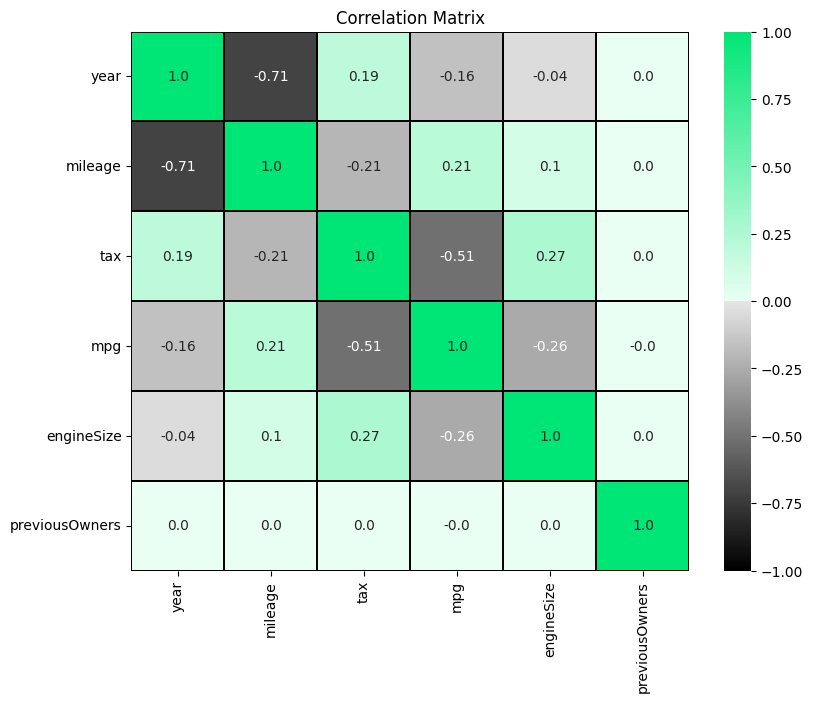

In [98]:
corr_features_pearson = df_train_new[numeric_features].corr(method="pearson").round(2)
print(corr_features_pearson)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_pearson,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

                year  mileage   tax   mpg  engineSize  previousOwners
year            1.00    -0.80  0.32 -0.32       -0.04             0.0
mileage        -0.80     1.00 -0.26  0.33        0.10             0.0
tax             0.32    -0.26  1.00 -0.56        0.16            -0.0
mpg            -0.32     0.33 -0.56  1.00       -0.20             0.0
engineSize     -0.04     0.10  0.16 -0.20        1.00             0.0
previousOwners  0.00     0.00 -0.00  0.00        0.00             1.0


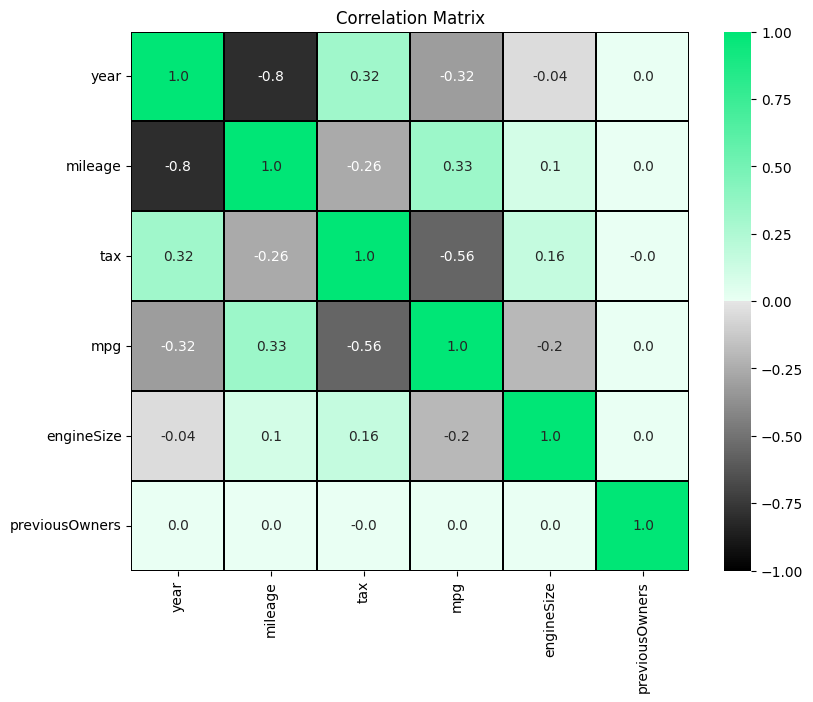

In [99]:
corr_features_spearman = df_train_new[numeric_features].corr(method="spearman").round(2)
print(corr_features_spearman)

plt.figure(figsize=(9,7),dpi=100)
cmap = LinearSegmentedColormap.from_list("black_to_green",
    [(0.0, "#000000"), (0.50, "#e6e6e6"), (0.5001, "#eafff3"), (1.0, "#00E676")]
)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
sns.heatmap(
    corr_features_spearman,
    annot= True,
    fmt="", 
    cmap=cmap,
    linecolor="black",
    linewidths=0.1,
    norm = norm,
)
plt.title("Correlation Matrix")
plt.show()

In [100]:
spearman_threshold = 0.15

df_num_with_target = df_train_new[numeric_features + ["price"]]
corr_target_spearman = df_num_with_target.corr(method="spearman")["price"].drop("price")

spearman_selected = corr_target_spearman[ corr_target_spearman.abs() >= spearman_threshold ].index.tolist()
print("Numeric selected by Spearman (|ρ| >= 0.15):", spearman_selected)

Numeric selected by Spearman (|ρ| >= 0.15): ['year', 'mileage', 'tax', 'mpg', 'engineSize']


Given the generally low correlation coefficients obtained from both Pearson and Spearman methods, a threshold ≥ 0.15 was adopted to identify wich features are relevant.

Across both correlation matrices, previousOwners consistently demonstrates the weakest relationship with the other features, suggesting that it contributes little explanatory value and is therefore the least informative feature to retain.

In [101]:
corr_with_target = df_train_new[numeric_features + ["price"]].corr()["price"].sort_values(ascending=False)
corr_with_target

price             1.000000
engineSize        0.619947
year              0.486296
tax               0.302439
previousOwners    0.000530
mpg              -0.368804
mileage          -0.416965
Name: price, dtype: float64

<h3 style="color: #00E676;"> 3.1.2. Wrapper Methods </h3>

<h4 style="color: #00E676;">RFE Feature Selection </h4>

In [102]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [106]:
def build_rfe_pipeline(model, n_numeric_features):
    """
    Cria um pipeline completo com:
      - imputação + scaling + RFE nas features numéricas
      - imputação + OneHotEncoder nas categóricas
      - modelo final no fim
    """
    
    # 1. Pipeline for numeric features
    numeric_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("rfe", RFE(
            estimator=LinearRegression(),
            n_features_to_select=n_numeric_features
        ))
    ])
    
    # 2. Pipeline for categorical features
    categorical_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])
    
    # 3. Combines everything
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_pipeline, numeric_features),
            ("cat", categorical_pipeline, categorical_features)
        ]
    )
    
    # 4. Final Pipeline
    full_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    
    return full_pipeline


In [109]:
# number of features we want to test
max_num_features = len(numeric_features)
num_features_list = list(range(1, max_num_features + 1))

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

cv_scores_mae = []

for k in num_features_list:
    print(f"[INFO] Testing RFE with {k} numeric features...")
    
    model = LinearRegression()
    pipe = build_rfe_pipeline(model, n_numeric_features=k)
    
    scores = cross_val_score(pipe, X, y, cv=kf,
                             scoring=mae_scorer, n_jobs=-1)
    
    mean_mae = -scores.mean()
    cv_scores_mae.append(mean_mae)
    print(f"Mean CV MAE: {mean_mae:.2f}\n")


[INFO] Testing RFE with 1 numeric features...
Mean CV MAE: 3933.44

[INFO] Testing RFE with 2 numeric features...
Mean CV MAE: 2693.56

[INFO] Testing RFE with 3 numeric features...
Mean CV MAE: 2525.86

[INFO] Testing RFE with 4 numeric features...
Mean CV MAE: 2499.82

[INFO] Testing RFE with 5 numeric features...
Mean CV MAE: 2489.61

[INFO] Testing RFE with 6 numeric features...
Mean CV MAE: 2489.65



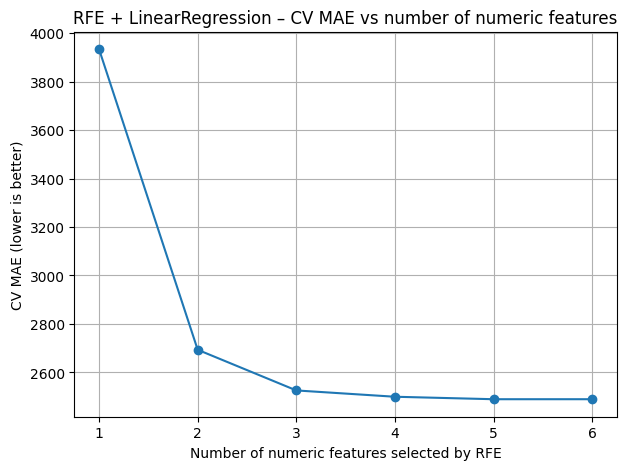

In [110]:
plt.figure(figsize=(7,5))
plt.plot(num_features_list, cv_scores_mae, marker="o")
plt.xlabel("Number of numeric features selected by RFE")
plt.ylabel("CV MAE (lower is better)")
plt.title("RFE + LinearRegression – CV MAE vs number of numeric features")
plt.grid(True)
plt.show()


In [111]:
best_idx = np.argmin(cv_scores_mae)
BEST_NUMERIC_FEATURES = num_features_list[best_idx]

print("======================================")
print(f"Best number of numeric features: {BEST_NUMERIC_FEATURES}")
print(f"Best CV MAE: {cv_scores_mae[best_idx]:.2f}")
print("======================================")

Best number of numeric features: 5
Best CV MAE: 2489.61


The plot reveals the relationship between model complexity and predictive performance. As we add more numeric features selected by RFE, we initially observe a decrease in MAE, indicating improved predictions. However, this improvement doesn't continue indefinitely. In our case, the optimal configuration uses **5 numeric features**, achieving a **MAE of 2469.87**. This subset captures the most predictive information while avoiding the pitfalls of including irrelevant or redundant features. 

In [112]:
def get_selected_numeric_features(n_numeric_features):
    base_model = LinearRegression()
    pipe = build_rfe_pipeline(base_model, n_numeric_features)
    
    pipe.fit(X, y)  # só para interpretação
    
    preproc = pipe.named_steps["preprocess"]
    num_pipeline = preproc.named_transformers_["num"]
    rfe_step = num_pipeline.named_steps["rfe"]
    
    mask = rfe_step.support_
    selected = np.array(numeric_features)[mask]
    
    return selected.tolist()

selected_numeric_features = get_selected_numeric_features(BEST_NUMERIC_FEATURES)

print("Selected numeric features:")
print(selected_numeric_features)


Selected numeric features:
['year', 'mileage', 'tax', 'mpg', 'engineSize']


<h3 style="color: #00E676;">3.1.3. Final Features to Modeling</h3>

<h4 style="color: #00E676;">Best Numeric Features</h4>

In [113]:
best_numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

<h4 style="color: #00E676;">Best Numeric Features and Engineered Features</h4>

In [114]:
engineered_features = [
    "Age",
    "age_bucket",
    "mileage_age_interaction"
]
num_best_eng_features = best_numeric_features + engineered_features
num_best_eng_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Age',
 'age_bucket',
 'mileage_age_interaction']

<h4 style="color: #00E676;">Best Numeric Features and Categorical Without Model</h4>

In [115]:
categorical_no_model = [
    "Brand_clean",
    "fuelType_clean",
    "transmission_clean"
]
num_cat_features = (best_numeric_features+ categorical_no_model)
num_cat_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean']

<h4 style="color: #00E676;">Best Numeric Features, Categorical Without Model and Engineered Features</h4>

In [116]:
best_cat_eng_features = num_cat_features + engineered_features
best_cat_eng_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean',
 'Age',
 'age_bucket',
 'mileage_age_interaction']

<h4 style="color: #00E676;">Mileage Age, tax and Categorical Without Model</h4>

In [127]:
cat_mileage_features= ["mileage", "Age", "tax"] + categorical_no_model
cat_mileage_features

['mileage',
 'Age',
 'tax',
 'Brand_clean',
 'fuelType_clean',
 'transmission_clean']

<h2 style="color: #00E676;">3.2. Predictive Modeling </h2>

In this section, we evaluate the predictive performance of the models using 5-fold cross-validation and testing the same models (**Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, **KNN** , **MLPRegressor**) across different feature sets. By starting with simpler variables and progressively introducing categorical information and engineered features, we are able to assess the individual contribution of each group of variables, while keeping the modeling setup consistent across experiments.

<h3 style="color: #00E676;">3.2.1. Numeric Features </h3>

Now , we focus exclusively on the most best numerical features (year, mileage, tax, mpg, engineSize) and evaluate their predictive performance across the same five models, establishing a baseline for comparison with more complex feature configurations

 **['year', 'mileage', 'tax', 'mpg', 'engineSize']**

<h4 style="color: #00E676;">Linear Regression </h4>

In [119]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 3704.2453
Validation MAE: 3704.5904


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [84]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 76.4508
Validation MAE: 2652.5887


<h4 style="color: #00E676;">RandomForestRegressor </h4>

In [85]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_numeric_features
)

Train MAE: 841.0496
Validation MAE: 2181.7393


<h4 style="color: #00E676;">KNN </h4>

In [86]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=best_numeric_features
)

Train MAE: 1868.2972
Validation MAE: 2318.9467


<h4 style="color: #00E676;">MLPRegressor </h4>

In [87]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=best_numeric_features
)

c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\anaconda3\env

Train MAE: 3106.5142
Validation MAE: 3110.1863


In [88]:
print(len(best_numeric_features))
best_numeric_features


5


['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [89]:
X.shape
X[best_numeric_features].shape


(75971, 5)

**Conclusion**:The results obtained using only numerical features show clear differences across models. The Random Forest Regressor achieves the best performance, with the lowest validation MAE **(2181.7393)**, indicating a stronger ability to capture non-linear relationships between numerical variables and price. KNN and Decision Tree models present intermediate performance, while Linear Regression and MLPRegressor perform worse in this setting.

Overall, these results suggest that although numerical features contain relevant information, their predictive power on their own is limited, highlighting the importance of incorporating categorical variables and feature engineering in subsequent modeling stages.

<h3 style="color: #00E676;">3.2.2. Numeric and Feature Engineering </h3>

Now we evaluate the same models using  the same numerical features combined with engineered features. The objective is to assess whether transforming and extending the original numerical variables leads to improved predictive performance when compared to the numeric-only baseline.

**['year' ,'mileage' ,'tax' ,'mpg' ,'engineSize' , 'Age' , 'age_bucket' , 'mileage_age_interaction']**

<h4 style="color: #00E676;">Linear Regression </h4>

In [90]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features= num_best_eng_features
)

Train MAE: 3602.3857
Validation MAE: 3603.2111


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [91]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_best_eng_features
)

Train MAE: 76.8909
Validation MAE: 2642.7083


<h4 style="color: #00E676;">Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_best_eng_features
)

Train MAE: 835.3234
Validation MAE: 2170.2575


<h4 style="color: #00E676;">KNN </h4>

In [300]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=num_best_eng_features
)

Train MAE: 1882.0558
Validation MAE: 2337.3366


<h4 style="color: #00E676;">MLPRegressor </h4>

In [120]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=num_best_eng_features
)

C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Train MAE: 3119.4445
Validation MAE: 3120.6747


**Conclusion**:The introduction of engineered features leads to only small changes in model performance when compared to using numerical features alone. The Random Forest Regressor remains the best-performing model, achieving the lowest validation MAE **(2170.2575)**, although the improvement over the previous scenario is limited. Decision Tree and Linear Regression show slight differences in performance, while KNN and MLPRegressor do not show clear improvements from feature engineering in this setting.

Overall, these results indicate that feature engineering applied only to numerical variables has a limited impact, reinforcing the need to include categorical variables in the next modeling stages.

<h3 style="color: #00E676;">3.2.3. Numeric and Categorical Features </h3>

In this subsection, we evaluate using both numerical and categorical features. By including categorical information, we aim to capture contextual differences between vehicles that cannot be explained by numerical variables alone and assess its impact on predictive performance.

**['year', 'mileage', 'tax', 'mpg', 'engineSize', 'Brand_clean', 'fuelType_clean', 'transmission_clean']**

<h4 style="color: #00E676;">Linear Regression </h4>

In [301]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 3047.0304
Validation MAE: 3048.4904


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [302]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 30.2868
Validation MAE: 1951.4701


<h4 style="color: #00E676;">Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=num_cat_features
)

Train MAE: 586.5773
Validation MAE: 1555.6514


<h4 style="color: #00E676;">KNN </h4>

In [304]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=num_cat_features
)

Train MAE: 1390.1817
Validation MAE: 1737.9426


<h4 style="color: #00E676;">MLPRegressor </h4>

In [121]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=num_cat_features
)

C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Train MAE: 2272.0644
Validation MAE: 2279.6533


**Conclusion**: The inclusion of only categorical features (without feature engineering) leads to a clear improvement in model performance across all models when compared to previous scenarios. The Random Forest Regressor achieves the best result, with the lowest validation MAE **(1555.6514)**, followed by KNN and Decision Tree, which also show strong reductions in error. Linear Regression and MLPRegressor improve as well, but remain less competitive in this setting.

Overall, these results highlight that categorical variables add substantial predictive value, significantly improving the models’ ability to capture price differences that cannot be explained by numerical features alone.

<h3 style="color: #00E676;">3.2.4. Numeric, Categorical and Engineered Features </h3>

In this subsection, we evaluate using numerical, categorical, and engineered features. This setup allows us to assess whether feature engineering provides additional improvements once categorical information is already included in the models.

**['year',  'mileage',  'tax', 'mpg',  'engineSize', 'Brand_clean', 'fuelType_clean', 'transmission_clean','Age','age_bucket', 'mileage_age_interaction']**

<h4 style="color: #00E676;">Linear Regression </h4>

In [305]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 2977.9637
Validation MAE: 2979.5832


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [306]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 30.2868
Validation MAE: 1942.2691


<h4 style="color: #00E676;">Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=best_cat_eng_features
)

Train MAE: 587.6957
Validation MAE: 1559.0774


<h4 style="color: #00E676;">KNN </h4>

In [308]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=best_cat_eng_features
)

Train MAE: 1398.4347
Validation MAE: 1745.1051


<h4 style="color: #00E676;">MLPRegressor </h4>

In [122]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=best_cat_eng_features
)

C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Train MAE: 2258.3585
Validation MAE: 2268.0776


**Conclusion**:Combining numerical, categorical, and engineered features results in performance levels very similar to those obtained using numeric and categorical features alone. The Random Forest Regressor continues to be the best-performing model, achieving a validation MAE of **1559.0774**, while KNN (**1745.1051**) and Decision Tree(**1942.2691**) also maintain strong performance. The remaining models show small variations but no substantial improvements.

Overall, these results suggest that once categorical information is included, additional feature engineering provides limited extra gains, indicating that categorical variables capture most of the relevant information for price prediction in this dataset.

<h3 style="color: #00E676;">3.2.5. Mileage Age, tax and Categorical Without Model </h3>

In this subsection, we evaluate using a reduced set of features, including mileage, age, tax, and categorical variables, while excluding detailed model information. The goal is to analyze how limiting the available information affects predictive performance.

**['mileage', 'Age', 'tax', 'Brand_clean', 'fuelType_clean', 'transmission_clean']**

<h4 style="color: #00E676;">Linear Regression </h4>

In [309]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 3848.0291
Validation MAE: 3848.479


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [310]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 304.8463
Validation MAE: 3751.5237


<h4 style="color: #00E676;">Random Forest Regressor </h4>

In [ ]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
    selected_features=cat_mileage_features
)

Train MAE: 1341.4927
Validation MAE: 3212.579


<h4 style="color: #00E676;">KNN </h4>

In [312]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
    selected_features=cat_mileage_features
)

Train MAE: 2615.4265
Validation MAE: 3206.4177


<h4 style="color: #00E676;">MLPRegressor </h4>

In [123]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=cat_mileage_features
)

C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Train MAE: 3276.4194
Validation MAE: 3283.4657


**Conclusion**: Using a reduced set of features that includes mileage, age, tax, and categorical variables, but excluding detailed model information, results in a clear decrease in predictive performance across all models. Although the Random Forest Regressor still achieves the best result within this setup (validation MAE of **3212.58**), the error is considerably higher than in scenarios that include full numerical and categorical information. KNN (**3206.4177**) and MLPRegressor(**3283.4657**) show similar performance, while Linear Regression and Decision Tree perform worse.

Overall, these results indicate that model-specific information plays a crucial role in price prediction, and that relying on a limited subset of numerical features, even when combined with categorical variables, is not sufficient to achieve strong predictive accuracy.

<h3 style="color: #00E676;">3.2.6. All Features </h3>

In this subsection, we evaluate all models using all available features. This configuration represents the most complete setup and allows us to assess the maximum predictive performance achievable when all information is provided to the models.

<h4 style="color: #00E676;">Linear Regression </h4>

In [313]:
lr_train_basic, lr_val_basic = avg_score(
    kf, X, y,
    model_class=LinearRegression,
    model_params={},
    scaler=None,
)

Train MAE: 2382.5429
Validation MAE: 2396.5965


<h4 style="color: #00E676;">Decision Tree Regressor </h4>

In [314]:
dt_train, dt_val = avg_score(
    kf, X, y,
    model_class=DecisionTreeRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
)

Train MAE: 7.7912
Validation MAE: 1757.4306


<h4 style="color: #00E676;">Random Forest Regressor </h4>

In [319]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "random_state": 42
    },
    scaler=None,
)

Train MAE: 511.3007
Validation MAE: 1372.3782


<h4 style="color: #00E676;">KNN </h4>

In [316]:
knn_train, knn_val = avg_score(
    kf, X, y,
    model_class=KNeighborsRegressor,
    model_params={"n_neighbors": 5},
    scaler=StandardScaler(), # MUITO IMPORTANTE
)

Train MAE: 1324.5304
Validation MAE: 1658.226


<h4 style="color: #00E676;">MLPRegressor </h4>

In [124]:
mlp_train_mae, mlp_val_mae = avg_score(
    kf,
    X,
    y,
    model_class=MLPRegressor,
    model_params={
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "max_iter": 500,
    "random_state": 42
},
    scaler=StandardScaler(),
    selected_features=cat_mileage_features
)

C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilizador\anaconda3\envs\pandas\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Train MAE: 3276.4194
Validation MAE: 3283.4657


**Conclusion**: Using all available features leads to the best overall predictive performance across the tested models. The Random Forest Regressor clearly outperforms the remaining approaches, achieving the lowest validation MAE (**1372.38**), followed by Decision Tree (**1757.4306**) and KNN (**1658.226**), which also show strong results. Linear Regression(**2396.5965**) benefits from the richer feature set but remains less competitive, while MLPRegressor(**3283.4657**) shows unstable performance in this configuration.

Overall, these results demonstrate that combining numerical, categorical, and engineered features provides the most complete representation of the data, allowing the models—particularly ensemble methods—to achieve the highest predictive accuracy.

<h2 style="color: #00E676;">3.3. Predictive Modeling With HyperParaments </h2>

In [128]:
rf_base_train, rf_base_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params={
        "n_estimators": 100,
        "random_state": 42,
        "n_jobs": -1
    },
    scaler=None
)

print("Baseline RF:")
print("Train:", np.mean(rf_base_train))
print("Val:", np.mean(rf_base_val))

Train MAE: 512.6711
Validation MAE: 1374.7387
Baseline RF:
Train: 512.6711113189018
Val: 1374.7386745792155


<h3 style="color: #00E676;">HyperParaments </h3>

Hyperparameter tuning was applied to the Random Forest Regressor, as it was the best-performing model in previous experiments. The tuning process aims to further improve predictive performance by adjusting key model parameters and comparing the results with the baseline configuration.

<h4 style="color: #00E676;">n_estimators </h4>

In [129]:
n_estimators_list = [100, 300]
results_n_estimators = {}

for n in n_estimators_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": n,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_n_estimators[n] = {
        "train_mean": (np.mean(train_scores)),
        "val_mean": (np.mean(val_scores)),
        "val_std": (np.std(val_scores))
    }

results_n_estimators

Train MAE: 512.6711
Validation MAE: 1374.7387
Train MAE: 507.4679
Validation MAE: 1370.8928


{100: {'train_mean': np.float64(512.6711113189018),
  'val_mean': np.float64(1374.7386745792155),
  'val_std': np.float64(18.491981884669084)},
 300: {'train_mean': np.float64(507.4678865761507),
  'val_mean': np.float64(1370.8928227413123),
  'val_std': np.float64(18.353480546481403)}}

In [110]:
best_n_estimators = 300

<h4 style="color: #00E676;">max_features </h4>

In [185]:
max_features_list = ["sqrt", "log2"]
results_max_features = {}

for mf in max_features_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": mf,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_features[mf] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_features

Train MAE: 513.1185
Validation MAE: 1379.2081
Train MAE: 515.6232
Validation MAE: 1385.2771


{'sqrt': {'train_mean': np.float64(513.1184601294349),
  'val_mean': np.float64(1379.2081097371756),
  'val_std': np.float64(23.815733806081557)},
 'log2': {'train_mean': np.float64(515.623157652393),
  'val_mean': np.float64(1385.2770724501913),
  'val_std': np.float64(24.51893403522858)}}

In [111]:
best_max_features = "sqrt"

<h4 style="color: #00E676;">max_depth </h4>

In [130]:
max_depth_list = [None, 25, 30]
results_max_depth = {}

for depth in max_depth_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": best_max_features,
            "max_depth": depth,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_depth[depth] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_depth


NameError: name 'best_n_estimators' is not defined

In [113]:
min_samples_leaf_list = [1, 5, 10, 20]
results_min_samples_leaf = {}

for msl in min_samples_leaf_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": 300,
            "max_features": "sqrt",
            "min_samples_leaf": msl,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_min_samples_leaf[msl] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_min_samples_leaf


Train MAE: 516.3187
Validation MAE: 1388.888
Train MAE: 1837.447
Validation MAE: 1919.4822
Train MAE: 2068.9808
Validation MAE: 2114.0007
Train MAE: 2295.0587
Validation MAE: 2323.195


{1: {'train_mean': np.float64(516.318716579224),
  'val_mean': np.float64(1388.8880247494822),
  'val_std': np.float64(23.410445093821515)},
 5: {'train_mean': np.float64(1837.4469548790094),
  'val_mean': np.float64(1919.4822051141346),
  'val_std': np.float64(30.885341452335446)},
 10: {'train_mean': np.float64(2068.9807662505245),
  'val_mean': np.float64(2114.0007322465203),
  'val_std': np.float64(27.083849489959423)},
 20: {'train_mean': np.float64(2295.0587026130115),
  'val_mean': np.float64(2323.195035104887),
  'val_std': np.float64(33.19308474271884)}}

In [ ]:
best_max_depth = None
best_min_samples_leaf = 1

In [131]:
bootstrap_list = [True, False]
results_bootstrap = {}

for bs in bootstrap_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": 300,
            "max_features": "sqrt",
            "max_depth": None,
            "min_samples_leaf": 1,
            "bootstrap": bs,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_bootstrap[bs] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_bootstrap

Train MAE: 512.901
Validation MAE: 1380.7388


KeyboardInterrupt: 

<h4 style="color: #00E676;">max_samples </h4>

In [ ]:
max_samples_list = [1.0, 0.7]
results_max_samples = {}

for ms in max_samples_list:
    train_scores, val_scores = avg_score(
        kf, X, y,
        model_class=RandomForestRegressor,
        model_params={
            "n_estimators": best_n_estimators,
            "max_features": best_max_features,
            "max_depth": best_max_depth,
            "min_samples_leaf": best_min_samples_leaf,
            "max_samples": ms,
            "bootstrap": True,
            "random_state": 42,
            "n_jobs": -1
        },
        scaler=None
    )

    results_max_samples[ms] = {
        "train_mean": np.mean(train_scores),
        "val_mean": np.mean(val_scores),
        "val_std": np.std(val_scores)
    }

results_max_samples

Train MAE: 513.1185
Validation MAE: 1379.2081
Train MAE: 695.0357
Validation MAE: 1392.5488


{1.0: {'train_mean': np.float64(513.1184601294349),
  'val_mean': np.float64(1379.2081097371756),
  'val_std': np.float64(23.815733806081557)},
 0.7: {'train_mean': np.float64(695.0356984909712),
  'val_mean': np.float64(1392.5488061733893),
  'val_std': np.float64(24.62069380530171)}}

<h4 style="color: #00E676;">Best Paraments </h4>

In [132]:
rf_final_params = {
    "n_estimators": 300,
    "max_features": "sqrt",
    "max_depth": None,
    "min_samples_leaf": 1,
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}


In [133]:
rf_train, rf_val = avg_score(
    kf, X, y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None,
)

Train MAE: 512.901
Validation MAE: 1380.7388


In [135]:
rf_final_model, rf_final_imputers, rf_final_scaler = run_model(
    X,
    y,
    model_class=RandomForestRegressor,
    model_params=rf_final_params,
    scaler=None
)

In [192]:
X_test = df_test_new.drop(columns=["carID"])

X_test_ready = prepare_test_for_model(
    X_test,
    rf_final_imputers,
    rf_final_scaler
)
y_test_pred = rf_final_model.predict(X_test_ready)
y_test_pred

array([11745.63      , 23459.39333333, 13585.96666667, ...,
       35314.36666667, 21009.42666667, 10909.18      ])

In [193]:
pd.Series(y_test_pred).sort_values(ascending=False).head(10)

3685     130290.556667
20965    114129.903333
11236    114072.833333
21895    108301.650000
14896    101954.573333
27190     95140.490000
2130      93948.666667
2473      93625.870000
30582     86869.723333
3892      85650.730000
dtype: float64

<h1 style="color: #00E676;">4. Open Ended Section </h1>

In [197]:
importances = pd.Series(
    rf_final_model.feature_importances_,
    index=X_test_ready.columns
).sort_values(ascending=False)

importances.head(10)

engineSize                      0.164681
mpg                             0.117670
mileage_age_interaction         0.096335
transmission_clean_manual       0.078257
mileage                         0.065048
year                            0.057011
Age                             0.053152
age_bucket                      0.052721
transmission_clean_semi-auto    0.030476
tax                             0.029282
dtype: float64

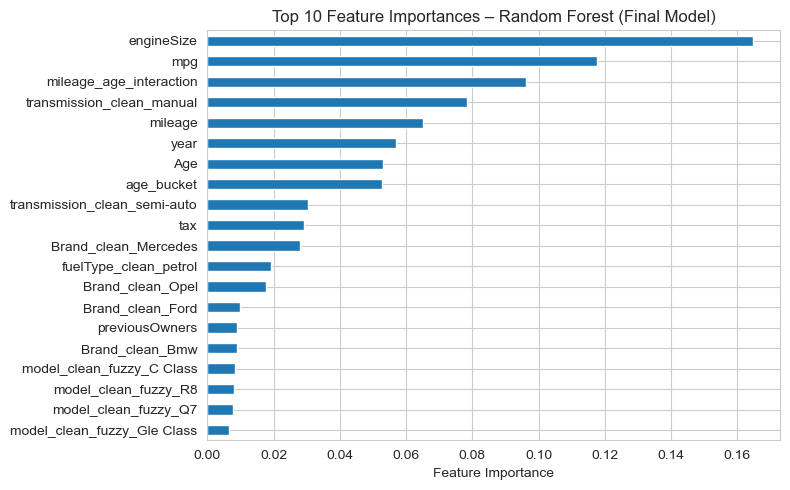

In [199]:
top_k = 20
top_importances = importances.head(top_k)
plt.figure(figsize=(8, 5))
top_importances.sort_values().plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances – Random Forest (Final Model)")
plt.tight_layout()
plt.show()

<h1 style="color: #00E676;">5. Deployment </h1>

In [120]:
submission = pd.DataFrame({
    "carID": df_test_new["carID"],
    "price": y_test_pred
})
submission.to_csv("submission.csv", index=False)

<h2 style="color: #00E676;">4.5. SVR </h2>

In [ ]:
para dar erro

svm_train, svm_val = avg_score(
    kf, X, y,
    model_class=SVR,
    model_params={
        "kernel": "rbf",   # melhor default para regressão
        "C": 1.0,
        "epsilon": 0.2
    },
    scaler=StandardScaler()   # OBRIGATÓRIO para SVM
)


Train MAE: 6314.9695
Validation MAE: 6315.2364

SVM Resultados:
Train MAE médio: 6314.969538241055
Val   MAE médio: 6315.236359077653


Atençaõ, demora entre 2 a 3 a correr e os resultados são terriveis

In [ ]:
df_test_new

,carID,year,mileage,tax,mpg,engineSize,previousOwners,Brand_clean,fuelType_clean,transmission_clean,model_clean_fuzzy
0,89856,NaN,30700.0,205.0,41.5,1.6,3.0,Hyundai,petrol,automatic,i30
1,106581,2017.0,NaN,150.0,38.2,2.0,2.0,Vw,petrol,semi-auto,tiguan
2,80886,2016.0,36792.0,125.0,51.4,1.5,2.0,Bmw,petrol,automatic,2 series
3,100174,2019.0,5533.0,145.0,44.1,1.2,1.0,Opel,petrol,manual,grandland x
4,81376,2019.0,9058.0,150.0,51.4,2.0,4.0,Bmw,diesel,semi-auto,1 series
...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,2017.0,27575.0,145.0,46.3,1.4,1.0,Vw,petrol,manual,tiguan
32563,81363,2020.0,1980.0,145.0,34.0,2.0,3.0,Bmw,petrol,automatic,x2
32564,76833,2019.0,8297.0,145.0,38.2,2.0,4.0,Audi,diesel,semi-auto,q5
32565,91768,2019.0,NaN,145.0,28.5,1.3,1.0,Mercedes,petrol,manual,a class


<h2 style="color: #00E676;">Neural Network Regressor </h2>

Otimização de parâmetros	

In [ ]:
final_mlp_basic, imp_mlp_basic, sc_mlp_basic = run_model(
    X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": best_basic,
        "activation": "relu",
        "solver": "adam",
        "max_iter": 800,
        "random_state": 42
    },
    scaler=StandardScaler(),
    include_advanced=False
)

mae_mlp_basic = evaluate_model(
    X, y,
    final_mlp_basic,
    imp_mlp_basic,
    sc_mlp_basic,
    include_advanced=False
)

print("Final BASIC MLP MAE:", mae_mlp_basic)

Modelo final BASIC

In [ ]:
layer_configs = [
    (32,),
    (64, 32),
    (128, 64, 32)
]

best_basic = None
best_mae_basic = float("inf")

best_full = None
best_mae_full = float("inf")

for config in layer_configs:

    # BASIC
    _, val_basic = avg_score(
        kf, X, y,
        model_class=MLPRegressor,
        model_params={
            "hidden_layer_sizes": config,
            "activation": "relu",
            "solver": "adam",
            "max_iter": 600,
            "random_state": 42
        },
        scaler=StandardScaler(),
    )

    # FULL
    _, val_full = avg_score(
        kf, X, y,
        model_class=MLPRegressor,
        model_params={
            "hidden_layer_sizes": config,
            "activation": "relu",
            "solver": "adam",
            "max_iter": 600,
            "random_state": 42
        },
        scaler=StandardScaler(),
        include_advanced=True
    )

    mae_b = np.mean(val_basic)
    mae_f = np.mean(val_full)

    if mae_b < best_mae_basic:
        best_mae_basic = mae_b
        best_basic = config

    if mae_f < best_mae_full:
        best_mae_full = mae_f
        best_full = config

print("Best BASIC layers:", best_basic, "| MAE:", best_mae_basic)
print("Best FULL layers:", best_full, "| MAE:", best_mae_full)


Modelo final FULL

In [ ]:
final_mlp_full, imp_mlp_full, sc_mlp_full = run_model(
    X, y,
    model_class=MLPRegressor,
    model_params={
        "hidden_layer_sizes": best_full,
        "activation": "relu",
        "solver": "adam",
        "max_iter": 800,
        "random_state": 42
    },
    scaler=StandardScaler(),
    include_advanced=True
)

mae_mlp_full = evaluate_model(
    X, y,
    final_mlp_full,
    imp_mlp_full,
    sc_mlp_full,
    include_advanced=True
)

print("Final FULL MLP MAE:", mae_mlp_full)